In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("combineddata.csv")
data.drop(columns=["Unnamed: 0", "NewSeverityScore"], inplace = True)
data

,SeverityScore,Age,Sex,GeneralHealth,AlcoholDrinkers,Smoker,Diabetes,BMI
0,5,77.0,1,1,0,1,1,32.099998
1,1,67.0,1,3,0,1,0,27.990000
2,0,62.0,0,4,1,0,0,22.530001
3,2,72.0,0,3,0,1,1,30.129999
4,0,52.0,1,2,0,0,0,27.760000
...,...,...,...,...,...,...,...,...
237625,2,62.0,1,2,0,0,1,36.580002
237626,3,57.0,1,2,0,1,0,25.059999
237627,3,47.0,0,1,0,1,0,22.889999
237628,0,27.0,1,3,0,0,0,18.840000


# Preliminary Step - Binary Classes

In [3]:
data["SeverityScore"].value_counts()

SeverityScore
0     89326
1     71367
2     40999
3     20076
4      9255
5      4105
6      1684
7       611
8       167
9        34
10        6
Name: count, dtype: int64

The strategy is starting simple and dealing with the data as if it was 2 classes: healthy (classes 0-4) and unhealthy (classes 5-10)

In [4]:
#so we are going to split the data into 2 classes

In [5]:
binary = {0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1}
data["NewSeverityScore"] = data["SeverityScore"].map(binary)
data

,SeverityScore,Age,Sex,GeneralHealth,AlcoholDrinkers,Smoker,Diabetes,BMI,NewSeverityScore
0,5,77.0,1,1,0,1,1,32.099998,1
1,1,67.0,1,3,0,1,0,27.990000,0
2,0,62.0,0,4,1,0,0,22.530001,0
3,2,72.0,0,3,0,1,1,30.129999,0
4,0,52.0,1,2,0,0,0,27.760000,0
...,...,...,...,...,...,...,...,...,...
237625,2,62.0,1,2,0,0,1,36.580002,0
237626,3,57.0,1,2,0,1,0,25.059999,0
237627,3,47.0,0,1,0,1,0,22.889999,0
237628,0,27.0,1,3,0,0,0,18.840000,0


In [6]:
dat = data.drop(columns="SeverityScore")
dat


,Age,Sex,GeneralHealth,AlcoholDrinkers,Smoker,Diabetes,BMI,NewSeverityScore
0,77.0,1,1,0,1,1,32.099998,1
1,67.0,1,3,0,1,0,27.990000,0
2,62.0,0,4,1,0,0,22.530001,0
3,72.0,0,3,0,1,1,30.129999,0
4,52.0,1,2,0,0,0,27.760000,0
...,...,...,...,...,...,...,...,...
237625,62.0,1,2,0,0,1,36.580002,0
237626,57.0,1,2,0,1,0,25.059999,0
237627,47.0,0,1,0,1,0,22.889999,0
237628,27.0,1,3,0,0,0,18.840000,0


In [7]:
#looking at how the classes are:
dat["NewSeverityScore"].value_counts()

NewSeverityScore
0    231023
1      6607
Name: count, dtype: int64

In [8]:
X = dat.drop(columns = "NewSeverityScore")
y = dat["NewSeverityScore"]

# Applying the Algorithms - Imbalanced Data
We start with imblanaced data, because as seen in https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets, we first fit the models on the imbalanced data to have a standard to approximate model performance on.

## Decision Trees
Can provide high interpretability by looking at the feature importances, by looking at the individual trees... This can allow us to get insight into what features are the most important when predicting health.

### Random Forests
Random forests will tell us which features are the most important ones (the bar chart graphs from assignment 3). This is good bc this provides high interpretability, which is what we want!

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
random_forest = ensemble.RandomForestClassifier(oob_score=True)
number_trees = np.arange(1, 100, 10)

recallclass2s = []

for m in number_trees:
    random_forest.set_params(n_estimators = m)
    model = random_forest.fit(X_train, y_train)
    #we can do smth w this model here
    #we want to look at the recall for class number 1
    #to do this we define the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
    print(cm)
    recallclass2 = cm[1, 1] / cm[1, :].sum() 
    print(f"recall w matrix: {recallclass2}")
    recallclass2s.append(recallclass2)
    print(f"recall with recall_score:", recall_score(y_test, y_pred))

/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[[56472  1287]
 [ 1386   263]]
recall w matrix: 0.15949060036385687
recall with recall_score: 0.15949060036385687


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[[56834   925]
 [ 1430   219]]
recall w matrix: 0.1328077622801698
recall with recall_score: 0.1328077622801698


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[[56817   942]
 [ 1432   217]]
recall w matrix: 0.13159490600363857
recall with recall_score: 0.13159490600363857
[[56842   917]
 [ 1416   233]]
recall w matrix: 0.14129775621588841
recall with recall_score: 0.14129775621588841
[[56817   942]
 [ 1423   226]]
recall w matrix: 0.13705275924802912
recall with recall_score: 0.13705275924802912
[[56798   961]
 [ 1426   223]]
recall w matrix: 0.13523347483323225
recall with recall_score: 0.13523347483323225
[[56802   957]
 [ 1417   232]]
recall w matrix: 0.1406913280776228
recall with recall_score: 0.1406913280776228
[[56827   932]
 [ 1417   232]]
recall w matrix: 0.1406913280776228
recall with recall_score: 0.1406913280776228
[[56816   943]
 [ 1421   228]]
recall w matrix: 0.13826561552456035
recall with recall_score: 0.13826561552456035
[[56792   967]
 [ 1418   231]]
recall w matrix: 0.1400848999393572
recall with recall_score: 0.1400848999393572


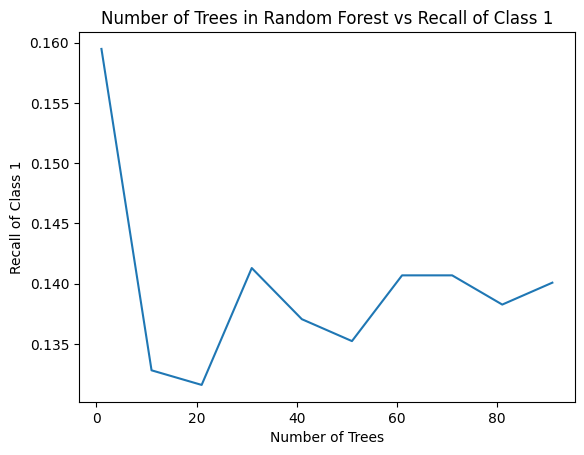

In [12]:
plt.plot(number_trees, recallclass2s)
plt.xlabel("Number of Trees")
plt.ylabel("Recall of Class 1")
plt.title("Number of Trees in Random Forest vs Recall of Class 1")
plt.show()

In [13]:
import textwrap

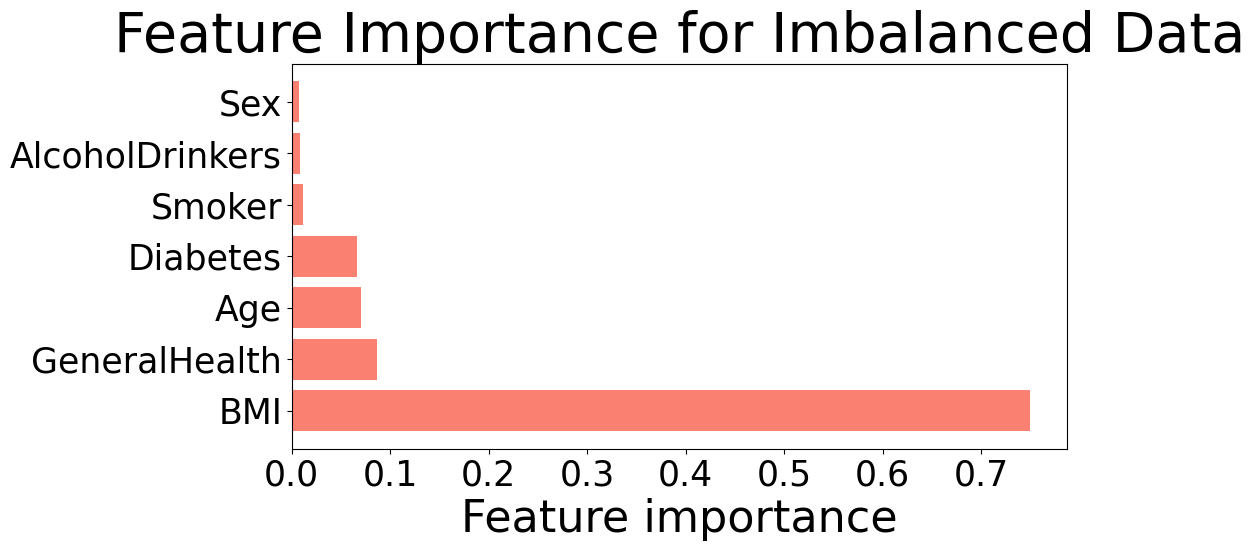

In [14]:
#let's focus on number of trees = 50
m = 50
random_forest.set_params(n_estimators=m) #min_samples_leaf = 1 here
model = random_forest.fit(X, y)
fig, ax = plt.subplots(figsize=(10,5))
inds = np.argsort(model.feature_importances_)
inds = np.flip(inds)
wrapped_title = textwrap.fill("Feature Importance for Imbalanced Data", width=40)
ax.barh(np.arange(7), model.feature_importances_[inds], color='salmon')
ax.set_yticks(np.arange(7))
_ = ax.set_yticklabels(X.columns[inds], fontsize=25)
_ = ax.set_xlabel('Feature importance', fontsize=32)
_ = ax.set_title(wrapped_title, fontsize=40)
plt.xticks(fontsize=25)
plt.show()

We can see that BMI is the most important feature - it provides the most information when determining whether someone is unhealthy (class 1) or healthy (class 0).

In [15]:
#doing some experimenting with the values:

In [16]:
random_forest = ensemble.RandomForestClassifier(oob_score=True, min_samples_leaf=1000)
number_trees = np.arange(1, 100, 10)

recallclass2s = []

for m in number_trees:
    random_forest.set_params(n_estimators = m)
    model = random_forest.fit(X_train, y_train)
    #we want to look at the recall for class number 1
    #to do this we define the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
    print(cm)
    recallclass2 = cm[1, 1] / cm[1, :].sum() 
    recallclass2s.append(recallclass2)

/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[[57759     0]
 [ 1649     0]]


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[[57759     0]
 [ 1649     0]]


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]


In [17]:
print(recallclass2s) #we have nan (0) because no class 1 are predicted at all, ever. only class 0 is predicted. so this depth is not looking very good.

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


In [18]:
random_forest = ensemble.RandomForestClassifier(oob_score=True, min_samples_leaf=100)
number_trees = np.arange(1, 100, 10)

recallclass2s = []

for m in number_trees:
    random_forest.set_params(n_estimators = m)
    model = random_forest.fit(X_train, y_train)
    #we can do smth w this model here
    #we want to look at the recall for class number 1
    #to do this we define the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
    print(cm)
    recallclass2 = cm[1, 1] / cm[1, :].sum() 
    recallclass2s.append(recallclass2)
print(recallclass2s)

[[57759     0]
 [ 1649     0]]


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[[57752     7]
 [ 1635    14]]


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[[57756     3]
 [ 1647     2]]
[[57757     2]
 [ 1647     2]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[[57759     0]
 [ 1649     0]]
[np.float64(0.0), np.float64(0.008489993935718617), np.float64(0.001212856276531231), np.float64(0.001212856276531231), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


Out of the 5 times this was ran, 4 times class 1 was never predicted, but 1 time it was prdicted once. When it was predicted, however, it had a low recallof around 0.02.

We want to look deeper into the performance of these 3 forests, so we can use cross validation, and use the recall of class 1 as our metric rather than the model score. We can also look at the PRC curve.

**Below is the data used in the report**:

In [19]:
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score


Looking at trees with 1, 10, 100, 1000 minimum samples per leaf:

In [20]:
from sklearn import tree
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import KFold
import textwrap

[[45416   726]
 [ 1168   216]]
the recall for class 1 is 0.15606936416184972
Area Under ROC: 0.7711494962897893


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


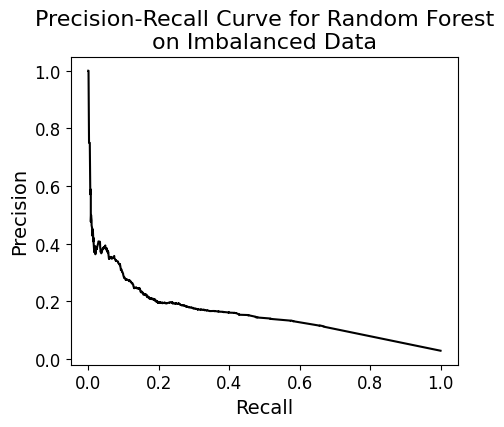

Area Under the PRC: 0.1449098767632757
[[45469   741]
 [ 1123   193]]
the recall for class 1 is 0.1466565349544073
Area Under ROC: 0.7769715728841965


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


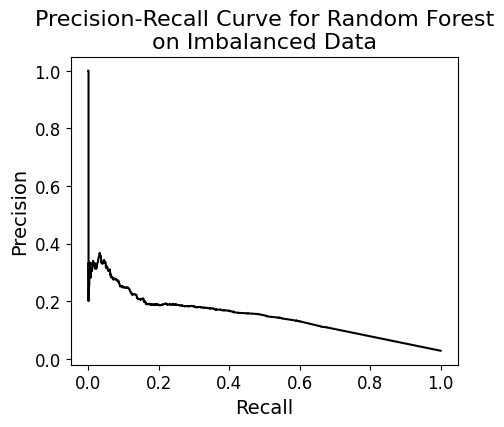

Area Under the PRC: 0.13533579888864605
[[45435   726]
 [ 1165   200]]
the recall for class 1 is 0.14652014652014653
Area Under ROC: 0.7854878287516228


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


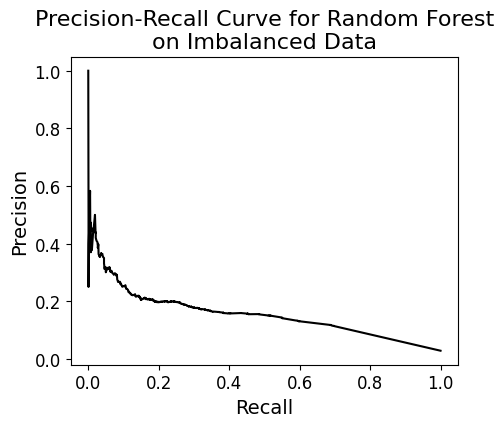

Area Under the PRC: 0.14274859028069894
[[45472   772]
 [ 1098   184]]
the recall for class 1 is 0.1435257410296412
Area Under ROC: 0.7705263210095915


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


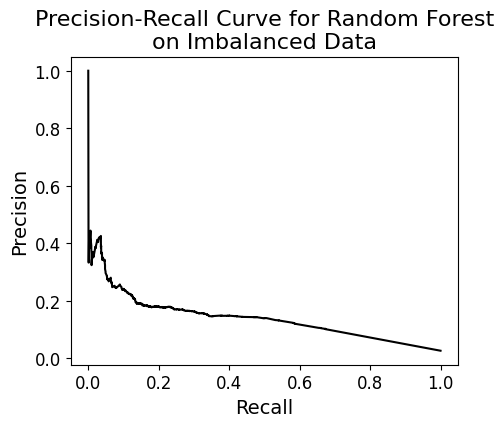

Area Under the PRC: 0.12770398712585818
[[45464   802]
 [ 1052   208]]
the recall for class 1 is 0.16507936507936508
Area Under ROC: 0.7780588388469987


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


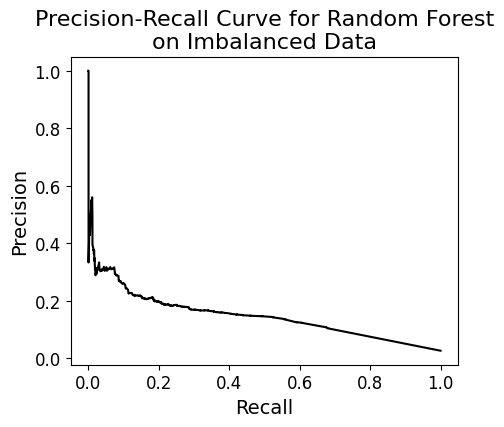

Area Under the PRC: 0.13555890020406847
AUPRC
[np.float64(0.1449098767632757), np.float64(0.13533579888864605), np.float64(0.14274859028069894), np.float64(0.12770398712585818), np.float64(0.13555890020406847)]
mean of  0.13725143065250947  with standard deviation of  0.0061083310826693885
upper bound:  0.14335976173517886 lower bound:  0.13114309956984008
Recall
[np.float64(0.15606936416184972), np.float64(0.1466565349544073), np.float64(0.14652014652014653), np.float64(0.1435257410296412), np.float64(0.16507936507936508)]
mean of  0.15157023034908196  with standard deviation of  0.00796367357125655
upper bound:  0.1595339039203385 lower bound:  0.1436065567778254


In [21]:
#random forest with min_samples_leaf=1, 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_07 = []

rfrecall = []
rfauprc = []

kf = KFold(n_splits=5, shuffle = True, random_state=0)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ran_forest = ensemble.RandomForestClassifier(min_samples_leaf=1, random_state=0)
    ran_forest.fit(X_train, y_train)
    y_pred = ran_forest.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    rfrecall.append(recall)

    #looking at the ROC curve
    y_pred_probas = ran_forest.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(fpr, tpr)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    xp = np.linspace(0, 1, 10)
    #plt.plot(xp, xp, ls="--", color = "gray")
    #plt.title("ROC Curve")
    #plt.show()

    #looking at the AUC
    auc = roc_auc_score(y_true = y_test, y_score=y_pred_probas)
    print(f"Area Under ROC: {auc}")

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    plt.figure(figsize=(5, 4))
    plt.plot(recall, precision, color = "black")
    plt.xlabel("Recall", fontsize = 14)
    plt.ylabel("Precision", fontsize = 14)
    wrapped_title = textwrap.fill("Precision-Recall Curve for Random Forest on Imbalanced Data", width=40)
    plt.title(wrapped_title, fontsize=16)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    rfauprc.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.7))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_07.append(recall_1_threshold)

print("AUPRC")
print(rfauprc)
print("mean of ",np.array(rfauprc).mean(), " with standard deviation of ", np.array(rfauprc).std())
print("upper bound: ",np.array(rfauprc).mean() + np.array(rfauprc).std(),"lower bound: ", np.array(rfauprc).mean() - np.array(rfauprc).std())
print("Recall")
print(rfrecall)
print("mean of ",np.array(rfrecall).mean(), " with standard deviation of ", np.array(rfrecall).std())
print("upper bound: ",np.array(rfrecall).mean() + np.array(rfrecall).std(),"lower bound: ", np.array(rfrecall).mean() - np.array(rfrecall).std())



In [22]:
print(thresholds_recall_2)
print(thresholds_recall_07)

high = ([float(thresholds_recall_2[-1])])
low = ([float(thresholds_recall_2[0])])
avghigh = np.array(high).mean()
avglow = np.array(low).mean()
print(avghigh, avglow)

high = ([float(thresholds_recall_07[i][-1]) for i in range(1)])
low = ([float(thresholds_recall_07[i][0]) for i in range(1)])
avghigh09 = np.array(high).mean()
avglow09 = np.array(low).mean()
print(avghigh09, avglow09)

[array([0.]), array([0.]), array([0.]), array([0.]), array([0.])]
[array([0.0008    , 0.00083333, 0.001     , 0.00111111, 0.00125   ,
       0.00142857, 0.00153846, 0.00166667, 0.00181818, 0.002     ,
       0.00209524, 0.00214286, 0.00222222, 0.00230769, 0.00236945,
       0.0025    ])]
0.0 0.0
0.0025 0.0008


/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_95433/785032658.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  high = ([float(thresholds_recall_2[-1])])
/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_95433/785032658.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  low = ([float(thresholds_recall_2[0])])


Printing the thresholds: this is helping us identify what the ideal thresholds would be if we want the recall to be a certain value. (not displayed) if we want the recall to be exactly 1, the only threshold that will allow us to do this is 0, meaning we would have to classify every single instance as class 1. This makes sense as this ensures there are no false negatives, but this model would have a very high error. A model that classifies everyone as unhealthy is good for precautions, but in the real world it really has no value. When we look at the thresholds for a recall greater than 0.7, for some PRC's we still only have a threshold of 0, while for others we have thresholds between 0 and 0.009. These thresholds are very small, still indicating we should be classifying the majority of our samples as class 1. Again, this has little value in the actual context of the problem.

In [23]:
#random forest with min_samples_leaf=1000, 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_07 = []

rfrecall = []
rfauprc = []

kf = KFold(n_splits=5, shuffle = True, random_state=0)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ran_forest = ensemble.RandomForestClassifier(min_samples_leaf=1000, random_state=0)
    ran_forest.fit(X_train, y_train)
    y_pred = ran_forest.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    rfrecall.append(recall)

    #looking at the ROC curve
    y_pred_probas = ran_forest.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    rfauprc.append(auprc)

print("AUPRC")
print(rfauprc)
print("mean of ",np.array(rfauprc).mean(), " with standard deviation of ", np.array(rfauprc).std())
print("upper bound: ",np.array(rfauprc).mean() + np.array(rfauprc).std(),"lower bound: ", np.array(rfauprc).mean() - np.array(rfauprc).std())
print("Recall")
print(rfrecall)
print("mean of ",np.array(rfrecall).mean(), " with standard deviation of ", np.array(rfrecall).std())
print("upper bound: ",np.array(rfrecall).mean() + np.array(rfrecall).std(),"lower bound: ", np.array(rfrecall).mean() - np.array(rfrecall).std())



[[46142     0]
 [ 1384     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.2660385957295335
[[46210     0]
 [ 1316     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.2625069040309925
[[46161     0]
 [ 1365     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.26004574111680806
[[46244     0]
 [ 1282     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.23920501147099946
[[46266     0]
 [ 1260     0]]
the recall for class 1 is 0.0
Area Under the PRC: 0.2551648764563221
AUPRC
[np.float64(0.2660385957295335), np.float64(0.2625069040309925), np.float64(0.26004574111680806), np.float64(0.23920501147099946), np.float64(0.2551648764563221)]
mean of  0.2565922257609311  with standard deviation of  0.009386124223945672
upper bound:  0.2659783499848768 lower bound:  0.24720610153698544
Recall
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
mean of  0.0  with standard deviation of  0.0
upper bound:  0.0 lower bound:  0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


In [24]:
#random forest with min_samples_leaf=10, 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_07 = []

rfrecall = []
rfauprc = []

kf = KFold(n_splits=5, shuffle = True, random_state=0)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ran_forest = ensemble.RandomForestClassifier(min_samples_leaf=10, random_state=0)
    ran_forest.fit(X_train, y_train)
    y_pred = ran_forest.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    rfrecall.append(recall)

    #looking at the ROC curve
    y_pred_probas = ran_forest.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    rfauprc.append(auprc)

print("AUPRC")
print(rfauprc)
print("mean of ",np.array(rfauprc).mean(), " with standard deviation of ", np.array(rfauprc).std())
print("upper bound: ",np.array(rfauprc).mean() + np.array(rfauprc).std(),"lower bound: ", np.array(rfauprc).mean() - np.array(rfauprc).std())
print("Recall")
print(rfrecall)
print("mean of ",np.array(rfrecall).mean(), " with standard deviation of ", np.array(rfrecall).std())
print("upper bound: ",np.array(rfrecall).mean() + np.array(rfrecall).std(),"lower bound: ", np.array(rfrecall).mean() - np.array(rfrecall).std())



[[46088    54]
 [ 1330    54]]
the recall for class 1 is 0.03901734104046243


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.23839309455100327
[[46146    64]
 [ 1253    63]]
the recall for class 1 is 0.047872340425531915


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.240817868084837
[[46108    53]
 [ 1312    53]]
the recall for class 1 is 0.03882783882783883


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.2396316797928811
[[46197    47]
 [ 1235    47]]
the recall for class 1 is 0.036661466458658344


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.22257231727311777
[[46191    75]
 [ 1223    37]]
the recall for class 1 is 0.029365079365079365
Area Under the PRC: 0.22430717711293546
AUPRC
[np.float64(0.23839309455100327), np.float64(0.240817868084837), np.float64(0.2396316797928811), np.float64(0.22257231727311777), np.float64(0.22430717711293546)]
mean of  0.23314442736295496  with standard deviation of  0.007979738687273186
upper bound:  0.24112416605022816 lower bound:  0.22516468867568176
Recall
[np.float64(0.03901734104046243), np.float64(0.047872340425531915), np.float64(0.03882783882783883), np.float64(0.036661466458658344), np.float64(0.029365079365079365)]
mean of  0.038348813223514175  with standard deviation of  0.005914872415923466
upper bound:  0.04426368563943764 lower bound:  0.03243394080759071


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


In [25]:
#random forest with min_samples_leaf=100, 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_07 = []

rfrecall = []
rfauprc = []

kf = KFold(n_splits=5, shuffle = True, random_state=0)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ran_forest = ensemble.RandomForestClassifier(min_samples_leaf=100, random_state=0)
    ran_forest.fit(X_train, y_train)
    y_pred = ran_forest.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    rfrecall.append(recall)

    #looking at the ROC curve
    y_pred_probas = ran_forest.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    rfauprc.append(auprc)

print("AUPRC")
print(rfauprc)
print("mean of ",np.array(rfauprc).mean(), " with standard deviation of ", np.array(rfauprc).std())
print("upper bound: ",np.array(rfauprc).mean() + np.array(rfauprc).std(),"lower bound: ", np.array(rfauprc).mean() - np.array(rfauprc).std())
print("Recall")
print(rfrecall)
print("mean of ",np.array(rfrecall).mean(), " with standard deviation of ", np.array(rfrecall).std())
print("upper bound: ",np.array(rfrecall).mean() + np.array(rfrecall).std(),"lower bound: ", np.array(rfrecall).mean() - np.array(rfrecall).std())



[[46142     0]
 [ 1384     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.27223393528318746
[[46210     0]
 [ 1316     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.26840804561008547
[[46161     0]
 [ 1365     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.26212885496449045
[[46244     0]
 [ 1282     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Area Under the PRC: 0.24390595572949508
[[46266     0]
 [ 1260     0]]
the recall for class 1 is 0.0
Area Under the PRC: 0.2557667440564073
AUPRC
[np.float64(0.27223393528318746), np.float64(0.26840804561008547), np.float64(0.26212885496449045), np.float64(0.24390595572949508), np.float64(0.2557667440564073)]
mean of  0.2604887071287332  with standard deviation of  0.010006407652408471
upper bound:  0.27049511478114163 lower bound:  0.2504822994763247
Recall
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
mean of  0.0  with standard deviation of  0.0
upper bound:  0.0 lower bound:  0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


## Logistic Regression & Neural Networks
We lose some interpretability.

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import cross_validate

First, we fit one Logistic Regression to see how it performs.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = logreg.predict(X_test) #this uses the standard probabilities to predict (0.5 threshold)
y_pred_proba = logreg.predict_proba(X_test)[:, 1] 

#5-fold cross validation:
recall_scorer = make_scorer(recall_score, average=None, labels=[1]) 

scores = cross_validate(logreg, X, y, cv=5, scoring={'accuracy': 'accuracy', 'recall_class1': recall_scorer}) 

print(scores["test_accuracy"])

print(scores["test_recall_class1"])

[0.97161554 0.97226781 0.97197324 0.97216261 0.97243614]
[0.04538578 0.06429652 0.05904618 0.05980318 0.06056018]


The accuracy of the test set is very high, yet the recall is low. We want to check the threshold values to see how we can improve the recall.

Therefore, we can look at the ROC, PRC, AUC, AUPRC.

[[46036    80]
 [ 1351    59]]
the recall for class 1 is 0.04184397163120567


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


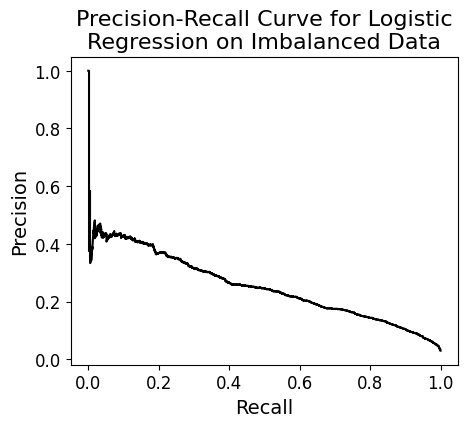

Area Under the PRC: 0.2527510713985561
[[ 0.03515827  0.22011117 -1.02970313 -0.26462172  0.71621001  1.7475837
   0.01895444]]
--------------
[[46114    82]
 [ 1242    88]]
the recall for class 1 is 0.06616541353383458


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


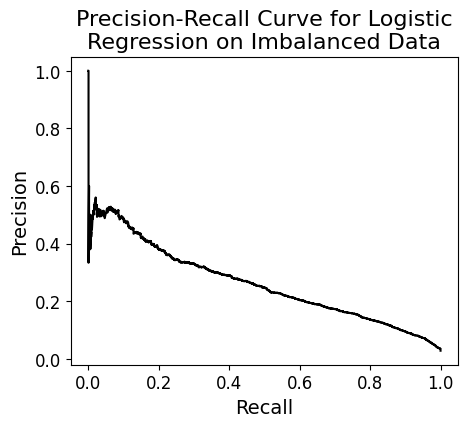

Area Under the PRC: 0.2614220152285684
[[ 0.03768335  0.17504943 -1.00393727 -0.28490467  0.70884335  1.74640064
   0.02136881]]
--------------
[[46216    98]
 [ 1141    71]]
the recall for class 1 is 0.05858085808580858


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


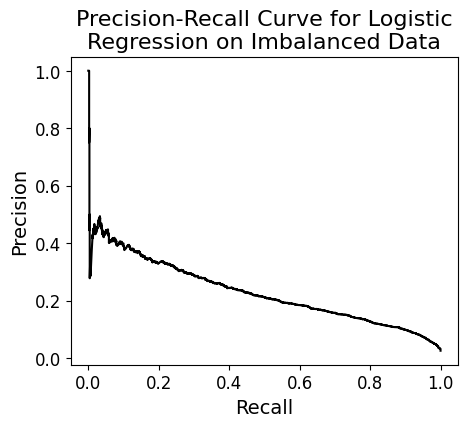

Area Under the PRC: 0.23047010529907472
[[ 0.03599416  0.21592825 -1.02925588 -0.27979311  0.71288917  1.73789206
   0.01916436]]
--------------
[[46046    77]
 [ 1325    78]]
the recall for class 1 is 0.05559515324305061


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


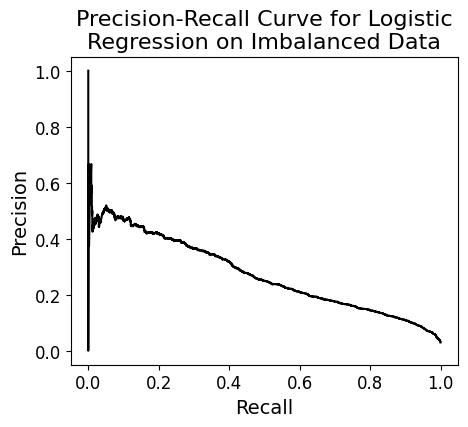

Area Under the PRC: 0.2735436494529335
[[ 0.03576739  0.20367255 -1.01482753 -0.27989606  0.68846042  1.73338598
   0.01979754]]
--------------
[[46205    69]
 [ 1172    80]]
the recall for class 1 is 0.06389776357827476


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


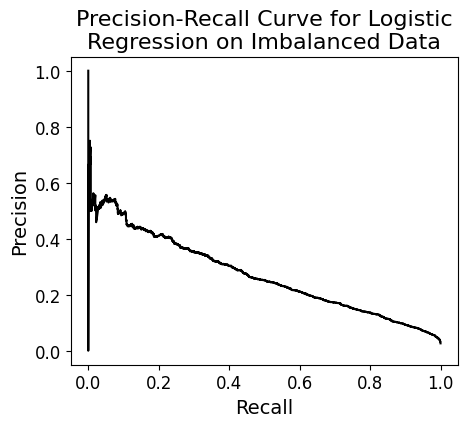

Area Under the PRC: 0.2718747394394262
[[ 0.03586309  0.19085255 -1.01006336 -0.30116414  0.68459256  1.72094528
   0.02010471]]
--------------
AUPRC
[np.float64(0.2527510713985561), np.float64(0.2614220152285684), np.float64(0.23047010529907472), np.float64(0.2735436494529335), np.float64(0.2718747394394262)]
mean of  0.25801231616371184  with standard deviation of  0.01569247728256982
upper bound:  0.2737047934462817 lower bound:  0.24231983888114203
Recall
[np.float64(0.04184397163120567), np.float64(0.06616541353383458), np.float64(0.05858085808580858), np.float64(0.05559515324305061), np.float64(0.06389776357827476)]
mean of  0.05721663201443483  with standard deviation of  0.008550171964273672
upper bound:  0.0657668039787085 lower bound:  0.04866646005016116


In [28]:
#looking at logistic regression
thresholds_recall_2 = []
thresholds_recall_09 = []
thresholds_recall_07 = []

lrauprc = []
lrrecall = []

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_probas = logreg.predict_proba(X_test)[:,1]

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    lrrecall.append(recall)

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    plt.figure(figsize=(5, 4))
    plt.plot(recall, precision, color = "black")
    plt.xlabel("Recall", fontsize = 14)
    plt.ylabel("Precision", fontsize = 14)
    wrapped_title = textwrap.fill("Precision-Recall Curve for Logistic Regression on Imbalanced Data", width=40)
    plt.title(wrapped_title, fontsize=16)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    lrauprc.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)
    
    recall_1_indices = ((recall[:-1] < 0.9) & (recall[:-1] > 0.7))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_07.append(recall_1_threshold)

    print(logreg.coef_)
    print("--------------")

print("AUPRC")
print(lrauprc)
print("mean of ",np.array(lrauprc).mean(), " with standard deviation of ", np.array(lrauprc).std())
print("upper bound: ",np.array(lrauprc).mean() + np.array(lrauprc).std(),"lower bound: ", np.array(lrauprc).mean() - np.array(lrauprc).std())
print("Recall")
print(lrrecall)
print("mean of ",np.array(lrrecall).mean(), " with standard deviation of ", np.array(lrrecall).std())
print("upper bound: ",np.array(lrrecall).mean() + np.array(lrrecall).std(),"lower bound: ", np.array(lrrecall).mean() - np.array(lrrecall).std())


The performance has decreased compared to decision trees. We see that the recall is now around 0.04 or 0.06, and for the "best" decision tree, it was 0.15. However, the area under the PRC has actually increased; this is bc the precision has increased. However it is irrelevant to us / it is not what we are seeking to maximize.

Looking at other thresholds to imprive the recall

In [29]:
thresholds_recall_2

[array([0.00014262, 0.00014382, 0.00014417, ..., 0.00061091, 0.00061092,
        0.00061098]),
 array([0.00012917, 0.000142  , 0.00014312, ..., 0.00134159, 0.00134191,
        0.00134193]),
 array([0.00014172, 0.00014421, 0.00014726, ..., 0.00128526, 0.00128533,
        0.00128551]),
 array([0.00014302, 0.00015166, 0.0001522 , ..., 0.00065181, 0.00065187,
        0.00065194]),
 array([0.00015235, 0.0001546 , 0.00015491, ..., 0.00103593, 0.001036  ,
        0.00103606])]

In [30]:
thresholds_recall_09

[array([0.00061123, 0.00061127, 0.00061129, ..., 0.01814932, 0.01815625,
        0.01815903]),
 array([0.00134248, 0.0013426 , 0.00134333, ..., 0.0167948 , 0.01679551,
        0.01679553]),
 array([0.00128563, 0.0012857 , 0.00128588, ..., 0.02006235, 0.02006905,
        0.02007127]),
 array([0.00065235, 0.00065249, 0.00065249, ..., 0.02065198, 0.02065841,
        0.02065852]),
 array([0.00103633, 0.00103677, 0.00103709, ..., 0.01812409, 0.01812527,
        0.01812757])]

In [31]:
thresholds_recall_07

[array([0.01827222, 0.01827239, 0.0182798 , ..., 0.05874377, 0.05878229,
        0.05881506]),
 array([0.01724376, 0.01724589, 0.01724596, ..., 0.06167998, 0.06174921,
        0.06175107]),
 array([0.02007153, 0.02007486, 0.0200753 , ..., 0.05832964, 0.05834016,
        0.05834746]),
 array([0.0206651 , 0.02066642, 0.02067312, ..., 0.06133477, 0.06135773,
        0.06136301]),
 array([0.01813728, 0.01814557, 0.01815007, ..., 0.0653666 , 0.06539204,
        0.06539206])]

In [32]:
#these are the thresholds that we got from each plot. 
print(thresholds_recall_2)

#we have different shapes for every different array, because different plots produced different thresholds.
print(thresholds_recall_2[0].shape)
print(thresholds_recall_2[1].shape)
print(thresholds_recall_2[2].shape)
print(thresholds_recall_2[3].shape)

#we are going to be looking at the first value and last value of each array, and then taking the average. this can help us get a better idea of the thresholds to use.
firsts1 = []
lasts1 = []
for i in range(4):
    one = thresholds_recall_2[i][0]
    firsts1.append(one)
    last = thresholds_recall_2[i][-1]
    lasts1.append(last)

print(firsts1)
print(lasts1)

first = sum(firsts1) / 4
print(first)
last = sum(lasts1) / 4
print(last)

firsts09 = []
lasts09 = []
for i in range(4):
    one = thresholds_recall_09[i][0]
    firsts09.append(one)
    last = thresholds_recall_09[i][-1]
    lasts09.append(last)

print(firsts09)
print(lasts09)

first09 = sum(firsts09) / 4
print(first09)
last09 = sum(lasts09) / 4
print(last09)

[array([0.00014262, 0.00014382, 0.00014417, ..., 0.00061091, 0.00061092,
       0.00061098]), array([0.00012917, 0.000142  , 0.00014312, ..., 0.00134159, 0.00134191,
       0.00134193]), array([0.00014172, 0.00014421, 0.00014726, ..., 0.00128526, 0.00128533,
       0.00128551]), array([0.00014302, 0.00015166, 0.0001522 , ..., 0.00065181, 0.00065187,
       0.00065194]), array([0.00015235, 0.0001546 , 0.00015491, ..., 0.00103593, 0.001036  ,
       0.00103606])]
(2879,)
(7179,)
(6826,)
(3000,)
[np.float64(0.00014262151128318392), np.float64(0.0001291728966427459), np.float64(0.0001417215562919109), np.float64(0.0001430246987404816)]
[np.float64(0.0006109761821584505), np.float64(0.0013419319744184576), np.float64(0.001285510568451792), np.float64(0.0006519391278908666)]
0.00013913516573958056
0.0009725894632298917
[np.float64(0.0006112282200878595), np.float64(0.0013424786292055436), np.float64(0.0012856349299029813), np.float64(0.0006523473515934181)]
[np.float64(0.018159034962026328),

In [33]:
#we are going to be using the first, last, and last09 thresholds (we are not using the first09 because it is very similar to last)
lr = LogisticRegression()
lr.fit(X_train, y_train)
ypredproba = lr.predict_proba(X_test)[:, 1]

first_preds = []
for i in range(ypredproba.shape[0]):
    if ypredproba[i] > first:
        first_preds.append(1)
    else:
        first_preds.append(0)
confm_first = confusion_matrix(y_pred=first_preds, y_true=y_test)
print(confm_first)
recall_first = confm_first[1, 1] / sum(confm_first[1, :])
print(recall_first)

last_preds = []
for i in range(ypredproba.shape[0]):
    if ypredproba[i] > last:
        last_preds.append(1)
    else:
        last_preds.append(0)
confm_last = confusion_matrix(y_pred=last_preds, y_true=y_test)
print(confm_last)
recall_last = confm_last[1, 1] / sum(confm_last[1, :])
print(recall_last)

last09_preds = []
for i in range(ypredproba.shape[0]):
    if ypredproba[i] > last:
        last09_preds.append(1)
    else:
        last09_preds.append(0)
confm_last09 = confusion_matrix(y_pred=last09_preds, y_true=y_test)
print(confm_last09)
recall_last09 = confm_last09[1, 1] / sum(confm_last09[1, :])
print(recall_last09)

[[    0 46274]
 [    0  1252]]
1.0
[[36260 10014]
 [  146  1106]]
0.8833865814696485
[[36260 10014]
 [  146  1106]]
0.8833865814696485


We have seen how the different thresholds have actually helped increase the recall. This is good, because now we have a logistic regression model that can achieve around 90% recall. However, the issue is that if we want to achieve 100% recall, all we need to do is predict every sample to belong in class 1; however as previously mentioned this is quite unrealistic. We can further look at the accuracies and precisions of these matrices to understand whether the classification we are doing is sensible, even if these two metrics are not the ones we are directly interested in optimizing.

In [34]:
#calculating accuracy and precision
print(confm_last09)
precision = confm_last09[1,1] / confm_last09[:, 1].sum()
print("the precision of the matrix is ", precision)
accuracy = (confm_last09[1,1] + confm_last09[0,0]) / confm_last09.sum()
print("the accuracy of this matrix is", accuracy)

[[36260 10014]
 [  146  1106]]
the precision of the matrix is  0.09946043165467626
the accuracy of this matrix is 0.7862222783318604


As we can see, the accuracy is quite high, around 77%. However, the precision is very low, 9%. This means that there are a lot of false positives - we are predicting more ppl to belong in class 1 than there actually are. This is good in terms of the recall because it makes it high, but bad in terms of real life context as previousy mentioned. There isnt really a point of having a model tell you that most people are sick, because the whole point would be to have the model tell you whether you are sick or not and be accurate about it.

So logistic regression was able to find higher recall matrices but they are not good in terms of precision and accuracy so they mean less to us in the context of the classifications.

### Neural Network

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

In [36]:
#looking at a neural network with hidden layer size 8, using 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_09 = []

nnimb8auprc = []
nnimb8recall = []

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=[8], activation="logistic", solver="sgd").fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    nnimb8recall.append(recall)

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(fpr, tpr)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    xp = np.linspace(0, 1, 10)
    #plt.plot(xp, xp, ls="--", color = "gray")
    #plt.title("ROC Curve")
    #plt.show()

    #looking at the AUC
    auc = roc_auc_score(y_true = y_test, y_score=y_pred_probas)
    #print(f"Area Under ROC: {auc}")

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    #print(f"Area Under the PRC: {auprc}")
    nnimb8auprc.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)


print("AUPRC")
print(nnimb8auprc)
print("mean of ",np.array(nnimb8auprc).mean(), " with standard deviation of ", np.array(nnimb8auprc).std())
print("upper bound: ",np.array(nnimb8auprc).mean() + np.array(nnimb8auprc).std(),"lower bound: ", np.array(nnimb8auprc).mean() - np.array(nnimb8auprc).std())
print("Recall")
print(nnimb8recall)
print("mean of ",np.array(nnimb8recall).mean(), " with standard deviation of ", np.array(nnimb8recall).std())
print("upper bound: ",np.array(nnimb8recall).mean() + np.array(nnimb8recall).std(),"lower bound: ", np.array(nnimb8recall).mean() - np.array(nnimb8recall).std())

[[46116     0]
 [ 1410     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46196     0]
 [ 1330     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46314     0]
 [ 1212     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46123     0]
 [ 1403     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46274     0]
 [ 1252     0]]
the recall for class 1 is 0.0
AUPRC
[np.float64(0.019056753968672728), np.float64(0.017111859647560703), np.float64(0.042088803688254225), np.float64(0.26994156011682874), np.float64(0.015308283251418735)]
mean of  0.07270145213454703  with standard deviation of  0.09909866468361994
upper bound:  0.17180011681816698 lower bound:  -0.026397212549072915
Recall
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
mean of  0.0  with standard deviation of  0.0
upper bound:  0.0 lower bound:  0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


We have 0 class 1 predicted in all of the folds so we are going to change and check for new hyperparameters.

In [37]:
#looking at a neural network with hidden layer size 100
thresholds_recall_2 = []
thresholds_recall_09 = []

nnimb100auprc = []
nnimb100recall = []

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=[100], activation="logistic", solver="sgd").fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    nnimb100recall.append(recall)

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(fpr, tpr)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    xp = np.linspace(0, 1, 10)
    #plt.plot(xp, xp, ls="--", color = "gray")
    #plt.title("ROC Curve")
    #plt.show()

    #looking at the AUC
    auc = roc_auc_score(y_true = y_test, y_score=y_pred_probas)
    #print(f"Area Under ROC: {auc}")

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    #print(f"Area Under the PRC: {auprc}")
    nnimb100auprc.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print("AUPRC")
print(nnimb100auprc)
print("mean of ",np.array(nnimb100auprc).mean(), " with standard deviation of ", np.array(nnimb100auprc).std())
print("upper bound: ",np.array(nnimb100auprc).mean() + np.array(nnimb100auprc).std(),"lower bound: ", np.array(nnimb100auprc).mean() - np.array(nnimb100auprc).std())
print("Recall")
print(nnimb100recall)
print("mean of ",np.array(nnimb100recall).mean(), " with standard deviation of ", np.array(nnimb100recall).std())
print("upper bound: ",np.array(nnimb100recall).mean() + np.array(nnimb100recall).std(),"lower bound: ", np.array(nnimb100recall).mean() - np.array(nnimb100recall).std())


[[46107     9]
 [ 1394    16]]
the recall for class 1 is 0.011347517730496455


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46189     7]
 [ 1327     3]]
the recall for class 1 is 0.002255639097744361


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46304    10]
 [ 1203     9]]
the recall for class 1 is 0.007425742574257425


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46119     4]
 [ 1401     2]]
the recall for class 1 is 0.0014255167498218105


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46263    11]
 [ 1238    14]]
the recall for class 1 is 0.011182108626198083
AUPRC
[np.float64(0.25702031624275995), np.float64(0.2570710684238392), np.float64(0.23040971882147238), np.float64(0.27674833496264883), np.float64(0.27357186887459717)]
mean of  0.25896426146506346  with standard deviation of  0.016446157441189116
upper bound:  0.27541041890625256 lower bound:  0.24251810402387436
Recall
[np.float64(0.011347517730496455), np.float64(0.002255639097744361), np.float64(0.007425742574257425), np.float64(0.0014255167498218105), np.float64(0.011182108626198083)]
mean of  0.006727304955703626  with standard deviation of  0.004237551431175483
upper bound:  0.01096485638687911 lower bound:  0.002489753524528143


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


The data here is a little bit strange, because for some we have absolutely no class 2 predicted, but for others we have a recall of 0.01. The performance is still poor, though.

In [38]:
#looking at a naural network with hidden layer size [10, 10]
thresholds_recall_2 = []
thresholds_recall_09 = []

nnimb10auprc = []
nnimb10recall = []

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=[10, 10], activation="logistic", solver="sgd").fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    nnimb10recall.append(recall)

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(fpr, tpr)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    xp = np.linspace(0, 1, 10)
    #plt.plot(xp, xp, ls="--", color = "gray")
    #plt.title("ROC Curve")
    #plt.show()

    #looking at the AUC
    auc = roc_auc_score(y_true = y_test, y_score=y_pred_probas)
    #print(f"Area Under ROC: {auc}")

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    #print(f"Area Under the PRC: {auprc}")
    nnimb10auprc.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print("AUPRC")
print(nnimb10auprc)
print("mean of ",np.array(nnimb10auprc).mean(), " with standard deviation of ", np.array(nnimb10auprc).std())
print("upper bound: ",np.array(nnimb10auprc).mean() + np.array(nnimb10auprc).std(),"lower bound: ", np.array(nnimb10auprc).mean() - np.array(nnimb10auprc).std())
print("Recall")
print(nnimb10recall)
print("mean of ",np.array(nnimb10recall).mean(), " with standard deviation of ", np.array(nnimb10recall).std())
print("upper bound: ",np.array(nnimb10recall).mean() + np.array(nnimb10recall).std(),"lower bound: ", np.array(nnimb10recall).mean() - np.array(nnimb10recall).std())


[[46116     0]
 [ 1410     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46196     0]
 [ 1330     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46314     0]
 [ 1212     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46123     0]
 [ 1403     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46274     0]
 [ 1252     0]]
the recall for class 1 is 0.0
AUPRC
[np.float64(0.09941311749394545), np.float64(0.035055873714543294), np.float64(0.038659555559786146), np.float64(0.03968200583344884), np.float64(0.030673664254142665)]
mean of  0.048696843371173276  with standard deviation of  0.02555412272802189
upper bound:  0.07425096609919517 lower bound:  0.023142720643151385
Recall
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
mean of  0.0  with standard deviation of  0.0
upper bound:  0.0 lower bound:  0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Bad because we have class 1 not predicted at all.

In [39]:
#looking at a naural network with hidden layer size [50]
thresholds_recall_2 = []
thresholds_recall_09 = []

nnimb50auprc = []
nnimb50recall = []

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=[50], activation="logistic", solver="sgd").fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    nnimb50recall.append(recall)

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(fpr, tpr)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    xp = np.linspace(0, 1, 10)
    #plt.plot(xp, xp, ls="--", color = "gray")
    #plt.title("ROC Curve")
    #plt.show()

    #looking at the AUC
    auc = roc_auc_score(y_true = y_test, y_score=y_pred_probas)
    #print(f"Area Under ROC: {auc}")

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    #print(f"Area Under the PRC: {auprc}")
    nnimb50auprc.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print("AUPRC")
print(nnimb50auprc)
print("mean of ",np.array(nnimb50auprc).mean(), " with standard deviation of ", np.array(nnimb50auprc).std())
print("upper bound: ",np.array(nnimb50auprc).mean() + np.array(nnimb50auprc).std(),"lower bound: ", np.array(nnimb50auprc).mean() - np.array(nnimb50auprc).std())
print("Recall")
print(nnimb50recall)
print("mean of ",np.array(nnimb50recall).mean(), " with standard deviation of ", np.array(nnimb50recall).std())
print("upper bound: ",np.array(nnimb50recall).mean() + np.array(nnimb50recall).std(),"lower bound: ", np.array(nnimb50recall).mean() - np.array(nnimb50recall).std())




[[46116     0]
 [ 1410     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46196     0]
 [ 1330     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46314     0]
 [ 1212     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46123     0]
 [ 1403     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46274     0]
 [ 1252     0]]
the recall for class 1 is 0.0
AUPRC
[np.float64(0.2503716755627756), np.float64(0.2514410458258496), np.float64(0.23226857582646862), np.float64(0.27594393030529535), np.float64(0.2695119075400989)]
mean of  0.2559074270120976  with standard deviation of  0.0154656506170348
upper bound:  0.27137307762913243 lower bound:  0.2404417763950628
Recall
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
mean of  0.0  with standard deviation of  0.0
upper bound:  0.0 lower bound:  0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Also bad because we have 0 recall

In [40]:
#looking at a neural network with layer sizes [100, 10]
thresholds_recall_2 = []
thresholds_recall_09 = []

nnimb10010auprc = []
nnimb10010recall = []

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=[100, 10], activation="logistic", solver="sgd").fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    nnimb10010recall.append(recall)

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(fpr, tpr)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    xp = np.linspace(0, 1, 10)
    #plt.plot(xp, xp, ls="--", color = "gray")
    #plt.title("ROC Curve")
    #plt.show()

    #looking at the AUC
    auc = roc_auc_score(y_true = y_test, y_score=y_pred_probas)
    #print(f"Area Under ROC: {auc}")

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    #print(f"Area Under the PRC: {auprc}")
    nnimb10010auprc.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print("AUPRC")
print(nnimb10010auprc)
print("mean of ",np.array(nnimb10010auprc).mean(), " with standard deviation of ", np.array(nnimb10010auprc).std())
print("upper bound: ",np.array(nnimb10010auprc).mean() + np.array(nnimb10010auprc).std(),"lower bound: ", np.array(nnimb10010auprc).mean() - np.array(nnimb10010auprc).std())
print("Recall")
print(nnimb10010recall)
print("mean of ",np.array(nnimb10010recall).mean(), " with standard deviation of ", np.array(nnimb10010recall).std())
print("upper bound: ",np.array(nnimb10010recall).mean() + np.array(nnimb10010recall).std(),"lower bound: ", np.array(nnimb10010recall).mean() - np.array(nnimb10010recall).std())


[[46116     0]
 [ 1410     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46196     0]
 [ 1330     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46314     0]
 [ 1212     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46123     0]
 [ 1403     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46274     0]
 [ 1252     0]]
the recall for class 1 is 0.0
AUPRC
[np.float64(0.2506595797329337), np.float64(0.04633143161319425), np.float64(0.23225149794218397), np.float64(0.0756783679437858), np.float64(0.03971060107595949)]
mean of  0.12892629566161146  with standard deviation of  0.09285664586978155
upper bound:  0.221782941531393 lower bound:  0.0360696497918299
Recall
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
mean of  0.0  with standard deviation of  0.0
upper bound:  0.0 lower bound:  0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


This was also bad because class 1 is never predicted.

In [41]:
#looking at a neural network with layer sizes [1]
thresholds_recall_2 = []
thresholds_recall_09 = []

nnimb1auprc = []
nnimb1recall = []

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=[1], activation="logistic", solver="sgd").fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    nnimb1recall.append(recall)

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(fpr, tpr)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    xp = np.linspace(0, 1, 10)
    #plt.plot(xp, xp, ls="--", color = "gray")
    #plt.title("ROC Curve")
    #plt.show()

    #looking at the AUC
    auc = roc_auc_score(y_true = y_test, y_score=y_pred_probas)
    #print(f"Area Under ROC: {auc}")

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    #print(f"Area Under the PRC: {auprc}")
    nnimb1auprc.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print("AUPRC")
print(nnimb1auprc)
print("mean of ",np.array(nnimb1auprc).mean(), " with standard deviation of ", np.array(nnimb1auprc).std())
print("upper bound: ",np.array(nnimb1auprc).mean() + np.array(nnimb1auprc).std(),"lower bound: ", np.array(nnimb1auprc).mean() - np.array(nnimb1auprc).std())
print("Recall")
print(nnimb1recall)
print("mean of ",np.array(nnimb1recall).mean(), " with standard deviation of ", np.array(nnimb1recall).std())
print("upper bound: ",np.array(nnimb1recall).mean() + np.array(nnimb1recall).std(),"lower bound: ", np.array(nnimb1recall).mean() - np.array(nnimb1recall).std())



[[46116     0]
 [ 1410     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46196     0]
 [ 1330     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46314     0]
 [ 1212     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46123     0]
 [ 1403     0]]
the recall for class 1 is 0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46274     0]
 [ 1252     0]]
the recall for class 1 is 0.0
AUPRC
[np.float64(0.018884082451287972), np.float64(0.018352683837549996), np.float64(0.04548834150571469), np.float64(0.01864737736220834), np.float64(0.018221548427603273)]
mean of  0.023918806716872857  with standard deviation of  0.0107872306251523
upper bound:  0.03470603734202515 lower bound:  0.013131576091720557
Recall
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
mean of  0.0  with standard deviation of  0.0
upper bound:  0.0 lower bound:  0.0


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


The best one we found was one hidden layer of size 100, even though it still performed quite poorly. We can perform more cross validation to check for even more model performance.

In [42]:
logregnn = MLPClassifier(hidden_layer_sizes=100, activation="logistic", solver = "sgd").fit(X_train, y_train)
recallclass1s = []

#this makes sure that the recall of class 1 is used as the score to use in cross validation
recall_scorer = make_scorer(recall_score, average=None, labels=[1])

#using 10-fold CV

scores = cross_validate(logregnn, X, y, cv=10, scoring={'accuracy': 'accuracy', 'recall_class1': recall_scorer}) 
#it could be interesting to compare the accuracy of the model with the recall of class 1

print(scores["test_accuracy"])

print(scores["test_recall_class1"])

[0.97218365 0.97218365 0.97201532 0.97209948 0.97218365 0.97214156
 0.97218365 0.97222573 0.97222573 0.97222573]
[0.         0.         0.00151286 0.00302572 0.02118003 0.00302572
 0.         0.00454545 0.         0.00151515]


Looking at the curves for hls=100:

precision:  0.3333333333333333
recall:  0.001445086705202312


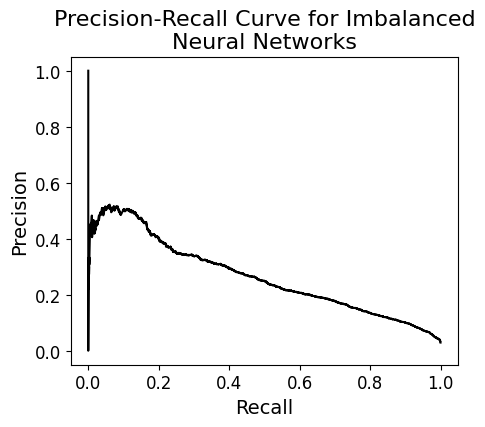

AUPRC:  0.265373096992882
----------------

precision:  0.56
recall:  0.010638297872340425


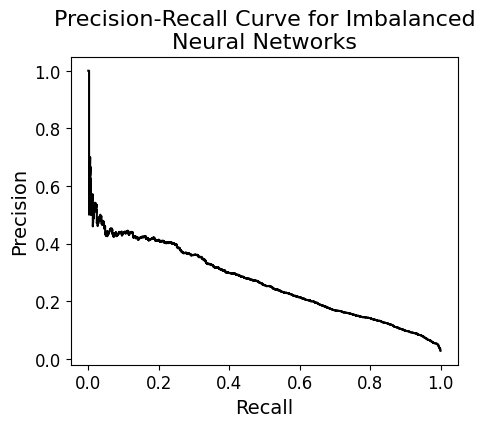

AUPRC:  0.26783674865620827
----------------

precision:  0.5
recall:  0.0014652014652014652


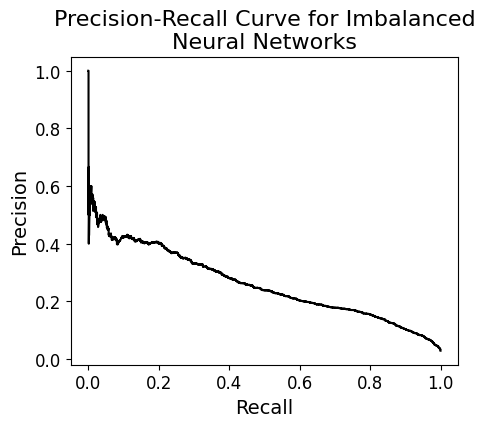

AUPRC:  0.2607509402150252
----------------

precision:  nan
recall:  0.0


/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_95433/3931260043.py:18: RuntimeWarning: invalid value encountered in scalar divide
  precision = confm[1, 1] / confm[:, 1].sum()


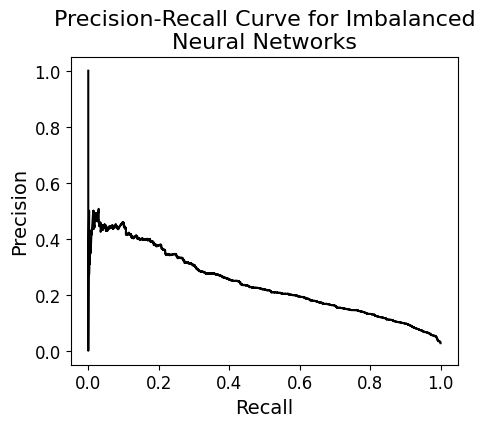

AUPRC:  0.24039389637275763
----------------

precision:  0.25
recall:  0.0007936507936507937


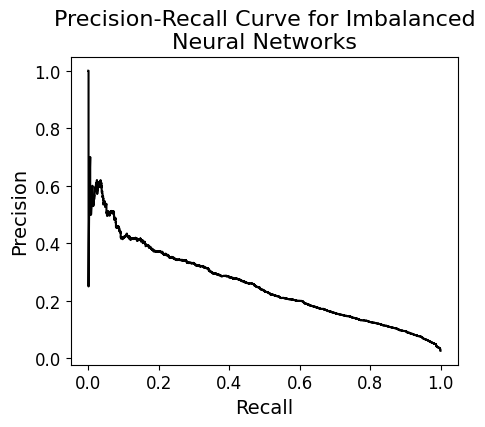

AUPRC:  0.2559216177605243
----------------

AUPRC
[np.float64(0.265373096992882), np.float64(0.26783674865620827), np.float64(0.2607509402150252), np.float64(0.24039389637275763), np.float64(0.2559216177605243)]
mean of  0.2580552599994795  with standard deviation of  0.009725956454635771
upper bound:  0.26778121645411523 lower bound:  0.2483293035448437
Recall
[np.float64(0.001445086705202312), np.float64(0.010638297872340425), np.float64(0.0014652014652014652), np.float64(0.0), np.float64(0.0007936507936507937)]
mean of  0.0028684473672789994  with standard deviation of  0.003921693578744705
upper bound:  0.006790140946023705 lower bound:  -0.001053246211465706


In [43]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
precision_vals = []
recall_vals = []
auprcs =[] 
aurocs = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logregnn = MLPClassifier(hidden_layer_sizes=100, activation="logistic", solver = "sgd")
    logregnn.fit(X_train, y_train)

    y_predict_proba = logregnn.predict_proba(X_test)[:, 1]
    y_pred = logregnn.predict(X_test)

    confm = confusion_matrix(y_pred=y_pred, y_true=y_test)
    precision = confm[1, 1] / confm[:, 1].sum()
    print("precision: ",precision)
    recall = confm[1, 1] / confm[1, :].sum()
    print("recall: ", recall)
    recall_vals.append(recall)

    #PRC
    precision, rec, thresholds = precision_recall_curve(y_test, y_predict_proba, pos_label=1)
    precision_vals.append(precision)
    #AUPRC
    prc_auc = average_precision_score(y_test, y_predict_proba)
    auprcs.append(prc_auc)
    #plot
    plt.figure(figsize=(5, 4))
    plt.plot(rec, precision, color = "black")
    plt.xlabel("Recall", fontsize = 14)
    plt.ylabel("Precision", fontsize = 14)
    wrapped_title = textwrap.fill("Precision-Recall Curve for Imbalanced Neural Networks", width=40)
    plt.title(wrapped_title, fontsize=16)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()

    #ROC
    #fpr, tpr, roc_thresholds = roc_curve(y_test, y_predict_proba, pos_label=1)
    #AUC
    #roc_auc = roc_auc_score(y_true = y_test, y_score=y_predict_proba)
    #aurocs.append(roc_auc)
    #plot
    #plt.figure(figsize=(5, 4))
    #plt.plot(fpr, tpr)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    #plt.title("Receiver-Operating Characteristic (ROC) Curve for Class 1")
    #plt.show()

    #print("AUROC: ", roc_auc)
    print("AUPRC: ", prc_auc)
    print("----------------\n")

print("AUPRC")
print(auprcs)
print("mean of ",np.array(auprcs).mean(), " with standard deviation of ", np.array(auprcs).std())
print("upper bound: ",np.array(auprcs).mean() + np.array(auprcs).std(),"lower bound: ", np.array(auprcs).mean() - np.array(auprcs).std())
print("Recall")
print(recall_vals)
print("mean of ",np.array(recall_vals).mean(), " with standard deviation of ", np.array(recall_vals).std())
print("upper bound: ",np.array(recall_vals).mean() + np.array(recall_vals).std(),"lower bound: ", np.array(recall_vals).mean() - np.array(recall_vals).std())


In [44]:
print(auprcs)
print(aurocs)

[np.float64(0.265373096992882), np.float64(0.26783674865620827), np.float64(0.2607509402150252), np.float64(0.24039389637275763), np.float64(0.2559216177605243)]
[]


I tried to do 1 - the probabilities, as I thought that this would "flip" the classifications, but this does not appear to be happening, in fact the models are performing terribly.

In [46]:
#extracting thresholds:

thresholds_recall_2 = []
thresholds_recall_09 = []

nnimb1auprc = []
nnimb1recall = []

k=3
kf = KFold(n_splits=k)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=[100], activation="logistic", solver="sgd").fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    #print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    #print(f"the recall for class 1 is {recall}")
    nnimb1recall.append(recall)

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(fpr, tpr)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    xp = np.linspace(0, 1, 10)
    #plt.plot(xp, xp, ls="--", color = "gray")
    #plt.title("ROC Curve")
    #plt.show()

    #looking at the AUC
    auc = roc_auc_score(y_true = y_test, y_score=y_pred_probas)
    #print(f"Area Under ROC: {auc}")

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    #print(f"Area Under the PRC: {auprc}")
    nnimb1auprc.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.7))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print(thresholds_recall_2)
high = thresholds_recall_2[-1]
low = thresholds_recall_2[0]
avghigh = np.mean(high)
avglow = np.mean(low)
print((avghigh, avglow))

high09 = [thresholds_recall_09[i][-1] for i in range(3)]
low09 = [thresholds_recall_09[i][0] for i in range(3)]
avghigh09 = np.mean(high09)
avglow09 = np.mean(low09)
print((avghigh09, avglow09))



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[array([8.68013319e-05, 8.68015746e-05, 8.68019306e-05, ...,
       2.72114797e-04, 2.72239711e-04, 2.72268613e-04]), array([8.69035838e-05, 8.76122627e-05, 8.81424079e-05, ...,
       7.55693467e-04, 7.55795053e-04, 7.55973740e-04]), array([0.00015091, 0.00015091, 0.00015091, ..., 0.00035406, 0.00035423,
       0.00035444])]
(np.float64(0.00025039428900528425), np.float64(0.00018108581204809163))
(np.float64(0.07101829085526483), np.float64(0.0004609675242308431))


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


# Applying the Algorithms - Balanced Data

What we are going to do to balance the data is undersampling. We are going to use the undersampling from imblearn, specifically the RandomUnderSampler function. We are only going to be resampling the majority class (class 0) and have it have the same number of samples as the minority class. It is not going to disrupt the distirbution - we can still get the same information out of both. It is just going to make it clearer what features influences what classes, instead of focusing on the features affecting only class 0 (the majority class).

## Decision Trees

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
#how the random under sampler works
rus = RandomUnderSampler(sampling_strategy="majority") #resamples only the majority class
X_res, y_res = rus.fit_resample(X_train, y_train)

print(X_res.shape)
print(X_train.shape)
print(y_res.value_counts() )
#we can see that the number of samples in the entire training set has decreased because of the undersampling
#and we can see that the classes are now balanced, they have an identical number of samples

(8790, 7)
(158420, 7)
NewSeverityScore
0    4395
1    4395
Name: count, dtype: int64


### Random Forests

In [49]:
#we implement cross validation
#defining the necessary models
rus = RandomUnderSampler(sampling_strategy="majority")
rfclf = ensemble.RandomForestClassifier(min_samples_leaf=1) #most specific tree we can fit
kf = KFold(n_splits=5, shuffle=True, random_state=0) #5 fold cross validation

recall_sc = []
prc_area = []
confmatrices = []

for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    rfclf.fit(X_train_res, y_train_res)

    y_pred = rfclf.predict(X_test_fold)
    y_pred_proba = rfclf.predict_proba(X_test_fold)[:, 1]

    #confusion matrix
    confm1 = confusion_matrix(y_test_fold, y_pred)
    print(confm1)
    confmatrices.append(confm1)

    #looking at recall
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)
    print("recall for class 1 is", recall)

    #looking at PRC
    precision, rec, threshold = precision_recall_curve(y_test_fold, y_pred_proba, pos_label = 1)
    auprc = average_precision_score(y_test_fold, y_pred_proba)
    prc_area.append(auprc)
    #plt.figure(figsize=(2.5, 2))
    #plt.plot(rec, precision, color = "black")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision Recall Curve")
    #plt.show()
    print("Area under PRC is", auprc)

    print("---------\n")

print("AUPRC")
print(prc_area)
print("mean of ",np.array(prc_area).mean(), " with standard deviation of ", np.array(prc_area).std())
print("upper bound: ",np.array(prc_area).mean() + np.array(prc_area).std(),"lower bound: ", np.array(prc_area).mean() - np.array(prc_area).std())
print("Recall")
print(recall_sc)
print("mean of ",np.array(recall_sc).mean(), " with standard deviation of ", np.array(recall_sc).std())
print("upper bound: ",np.array(recall_sc).mean() + np.array(recall_sc).std(),"lower bound: ", np.array(recall_sc).mean() - np.array(recall_sc).std())

[[24283  6485]
 [  189   727]]
recall for class 1 is 0.7936681222707423
Area under PRC is 0.1850841966621432
---------

[[23940  6854]
 [  185   705]]
recall for class 1 is 0.7921348314606742
Area under PRC is 0.15784681328762254
---------

[[24245  6539]
 [  149   751]]
recall for class 1 is 0.8344444444444444
Area under PRC is 0.17960441234101063
---------

[[24259  6577]
 [  174   674]]
recall for class 1 is 0.7948113207547169
Area under PRC is 0.1582312576381471
---------

[[24307  6536]
 [  175   666]]
recall for class 1 is 0.7919143876337693
Area under PRC is 0.15450096453247106
---------

AUPRC
[np.float64(0.1850841966621432), np.float64(0.15784681328762254), np.float64(0.17960441234101063), np.float64(0.1582312576381471), np.float64(0.15450096453247106)]
mean of  0.16705352889227892  with standard deviation of  0.012671168927012953
upper bound:  0.17972469781929187 lower bound:  0.15438235996526598
Recall
[np.float64(0.7936681222707423), np.float64(0.7921348314606742), np.float

In [50]:
for i in range(5):
    matrix = confmatrices[i]
    print(matrix)
    precision = matrix[1,1] / matrix[:, 1].sum()
    print("precision is", precision)
    recall = matrix[1,1] / matrix[1, :].sum()
    print("recall is", recall)

[[24283  6485]
 [  189   727]]
precision is 0.10080421519689406
recall is 0.7936681222707423
[[23940  6854]
 [  185   705]]
precision is 0.09326630506680778
recall is 0.7921348314606742
[[24245  6539]
 [  149   751]]
precision is 0.10301783264746228
recall is 0.8344444444444444
[[24259  6577]
 [  174   674]]
precision is 0.09295269617983726
recall is 0.7948113207547169
[[24307  6536]
 [  175   666]]
precision is 0.09247431269091919
recall is 0.7919143876337693


As we can see, the precisions are low for all of these matrices (0.09 - 0.1), which is why the area of the PRC is low even though we have high recall with this model. This means that there are going to be many false negatives.

In [51]:
rus = RandomUnderSampler(sampling_strategy="majority")
rfclf = ensemble.RandomForestClassifier(min_samples_leaf=1) #1 minimum samples per leaf
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0) #5 fold cross validation

recall_sc = []
area_sc = []

for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    rfclf.fit(X_train_res, y_train_res)

    y_pred = rfclf.predict(X_test_fold)
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)

    y_pred_proba = rfclf.predict_proba(X_test_fold)[:, 1]
    precision, rec, threshold = precision_recall_curve(y_test_fold, y_pred_proba, pos_label = 1)
    auprc = average_precision_score(y_test_fold, y_pred_proba)
    area_sc.append(auprc)
    #plt.figure(figsize=(2.5, 2))
    #plt.plot(precision, rec, color = "black")
    #plt.xlabel("Precision")
    #plt.ylabel("Recall")
    #plt.title("Precision Recall Curve for Random Forest on Balanced Data")
    #plt.show()
    #print("Area under PRC is", auprc)

print(recall_sc)
print("for recall")
print("mean of ",np.array(recall_sc).mean(), " with standard deviation of ", np.array(recall_sc).std())
print("upper bound: ",np.array(recall_sc).mean() + np.array(recall_sc).std(),"lower bound: ", np.array(recall_sc).mean() - np.array(recall_sc).std())
print(area_sc)
print("for AUPRC")
print("mean of ",np.array(area_sc).mean(), " with standard deviation of ", np.array(area_sc).std())
print("upper bound: ",np.array(area_sc).mean() + np.array(area_sc).std(),"lower bound: ", np.array(area_sc).mean() - np.array(area_sc).std())

[np.float64(0.787117903930131), np.float64(0.7887640449438202), np.float64(0.8422222222222222), np.float64(0.7841981132075472), np.float64(0.8002378121284186)]
for recall
mean of  0.8005080192864279  with standard deviation of  0.021556330380626217
upper bound:  0.8220643496670541 lower bound:  0.7789516889058017
[np.float64(0.17869763634763886), np.float64(0.15750360632146715), np.float64(0.16606669447972855), np.float64(0.15166746353586244), np.float64(0.1565317875870285)]
for AUPRC
mean of  0.16209343765434508  with standard deviation of  0.00950984356865722
upper bound:  0.1716032812230023 lower bound:  0.15258359408568786


In [52]:
#trying different parameters (same ones that we tried when we were doing the imbalanced)

rus = RandomUnderSampler(sampling_strategy="majority")
rfclf = ensemble.RandomForestClassifier(min_samples_leaf=1000) #1000 minimum samples per leaf
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0) #5 fold cross validation

recall_sc = []
area_sc = []
thresholds_recall_2 = []
thresholds_recall_07 = []

for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    rfclf.fit(X_train_res, y_train_res)

    y_pred = rfclf.predict(X_test_fold)
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)

    confmatrix = confusion_matrix(y_true = y_test_fold, y_pred=y_pred)
    print(confmatrix)

    y_pred_proba = rfclf.predict_proba(X_test_fold)[:, 1]
    precision, rec, threshold = precision_recall_curve(y_test_fold, y_pred_proba, pos_label = 1)
    auprc = average_precision_score(y_test_fold, y_pred_proba)
    area_sc.append(auprc)

    #plt.figure(figsize=(5, 4))
    #plt.plot(rec, precision, color = "black")
    #plt.xlabel("Recall", fontsize = 14)
    #plt.ylabel("Precision", fontsize = 14)
    #wrapped_title = textwrap.fill("Precision-Recall Curve for Random Forest on Balanced Data", width=40)
    #plt.title(wrapped_title, fontsize=16)
    #plt.xticks(fontsize = 12)
    #plt.yticks(fontsize = 12)
    #plt.show()

    print("Area under PRC is", auprc)

    recall_1_indices = rec[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_2.extend(recall_1_threshold.tolist())  # Add all values as scalars

    recall_1_indices = ((rec[:-1] < 1) & (rec[:-1] > 0.7))
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_07.extend(recall_1_threshold.tolist())  # Add all values as scalars

print(recall_sc)
print("for recall")
print("mean of ",np.array(recall_sc).mean(), " with standard deviation of ", np.array(recall_sc).std())
print("upper bound: ",np.array(recall_sc).mean() + np.array(recall_sc).std(),"lower bound: ", np.array(recall_sc).mean() - np.array(recall_sc).std())
print(area_sc)
print("for AUPRC")
print("mean of ",np.array(area_sc).mean(), " with standard deviation of ", np.array(area_sc).std())
print("upper bound: ",np.array(area_sc).mean() + np.array(area_sc).std(),"lower bound: ", np.array(area_sc).mean() - np.array(area_sc).std())

[[25073  5695]
 [  150   766]]
Area under PRC is 0.22409015886391132
[[25485  5309]
 [  176   714]]
Area under PRC is 0.20690688093814988
[[25232  5552]
 [  125   775]]
Area under PRC is 0.23494851599632088
[[25202  5634]
 [  133   715]]
Area under PRC is 0.20349174536232678
[[25422  5421]
 [  140   701]]
Area under PRC is 0.22027251805110576
[np.float64(0.8362445414847162), np.float64(0.802247191011236), np.float64(0.8611111111111112), np.float64(0.8431603773584906), np.float64(0.8335315101070154)]
for recall
mean of  0.8352589462145138  with standard deviation of  0.019102347809141898
upper bound:  0.8543612940236557 lower bound:  0.8161565984053719
[np.float64(0.22409015886391132), np.float64(0.20690688093814988), np.float64(0.23494851599632088), np.float64(0.20349174536232678), np.float64(0.22027251805110576)]
for AUPRC
mean of  0.21794196384236292  with standard deviation of  0.011515524043062969
upper bound:  0.2294574878854259 lower bound:  0.20642643979929995


We can see that when we have min_samples_leaf = 10, we have an area of the PRC that is higher than when we have min_samples_leaf = 1. We are also seeing that the recall is increasing, so this is a good sign.

In [53]:
print(thresholds_recall_07[-1])

0.569711101819822


In [54]:
rus = RandomUnderSampler(sampling_strategy="majority")
rfclf = ensemble.RandomForestClassifier(min_samples_leaf=100) #100 minimum samples per leaf
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0) #5 fold cross validation

recall_sc = []
area_sc = []

thresholds_recall_2 = []
thresholds_recall_07 = []


for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    rfclf.fit(X_train_res, y_train_res)

    y_pred = rfclf.predict(X_test_fold)
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)

    confmatrix = confusion_matrix(y_true = y_test_fold, y_pred=y_pred)
    print(confmatrix)

    y_pred_proba = rfclf.predict_proba(X_test_fold)[:, 1]
    precision, rec, threshold = precision_recall_curve(y_test_fold, y_pred_proba, pos_label = 1)
    auprc = average_precision_score(y_test_fold, y_pred_proba)
    area_sc.append(auprc)
    #plt.figure(figsize=(2.5, 2))
    #plt.plot(rec, precision, color = "black")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision Recall Curve for Random Forest on Balanced Data")
    #plt.show()
    print("Area under PRC is", auprc)

    recall_1_indices = rec[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_2.extend(recall_1_threshold.tolist())  # Add all values as scalars

    recall_1_indices = ((rec[:-1] < 1) & (rec[:-1] > 0.7))
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_07.extend(recall_1_threshold.tolist())

print(recall_sc)
print("for recall")
print("mean of ",np.array(recall_sc).mean(), " with standard deviation of ", np.array(recall_sc).std())
print("upper bound: ",np.array(recall_sc).mean() + np.array(recall_sc).std(),"lower bound: ", np.array(recall_sc).mean() - np.array(recall_sc).std())
print(area_sc)
print("for AUPRC")
print("mean of ",np.array(area_sc).mean(), " with standard deviation of ", np.array(area_sc).std())
print("upper bound: ",np.array(area_sc).mean() + np.array(area_sc).std(),"lower bound: ", np.array(area_sc).mean() - np.array(area_sc).std())

[[24911  5857]
 [  133   783]]
Area under PRC is 0.2539559617623242
[[24734  6060]
 [  141   749]]
Area under PRC is 0.2358092287003178
[[24790  5994]
 [   99   801]]
Area under PRC is 0.2614017259417029
[[24954  5882]
 [  122   726]]
Area under PRC is 0.2278193808211084
[[24856  5987]
 [  113   728]]
Area under PRC is 0.24419885317798268
[np.float64(0.8548034934497817), np.float64(0.8415730337078652), np.float64(0.89), np.float64(0.8561320754716981), np.float64(0.8656361474435196)]
for recall
mean of  0.861628950014573  with standard deviation of  0.016124617046427998
upper bound:  0.8777535670610009 lower bound:  0.845504332968145
[np.float64(0.2539559617623242), np.float64(0.2358092287003178), np.float64(0.2614017259417029), np.float64(0.2278193808211084), np.float64(0.24419885317798268)]
for AUPRC
mean of  0.24463703008068718  with standard deviation of  0.012073548921728874
upper bound:  0.25671057900241606 lower bound:  0.2325634811589583


Looking at 10 min samples per leaf

In [55]:
from sklearn.ensemble import RandomForestClassifier

[[24851  5917]
 [  135   781]]


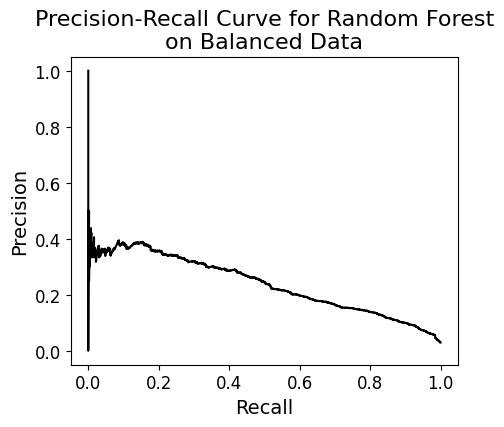

Area under PRC is 0.2388785228164024
[[24479  6315]
 [  135   755]]


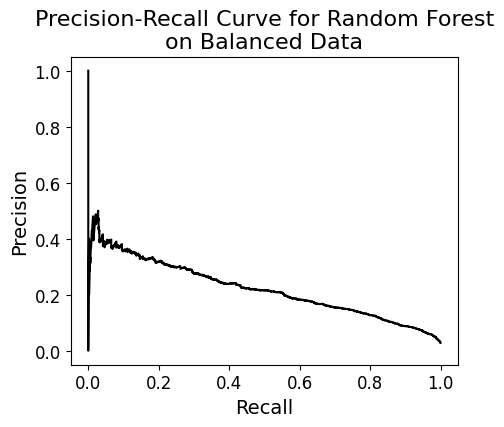

Area under PRC is 0.22083566942869098
[[24479  6305]
 [   95   805]]


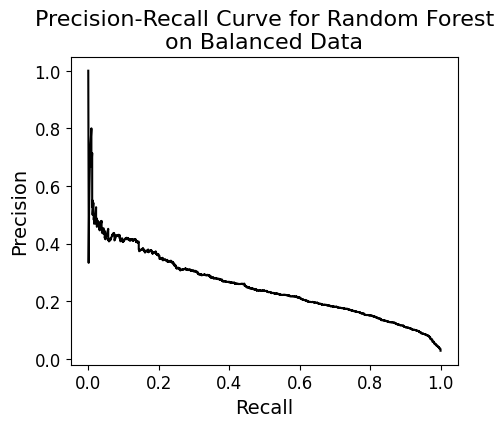

Area under PRC is 0.2521978776187668
[[24597  6239]
 [  105   743]]


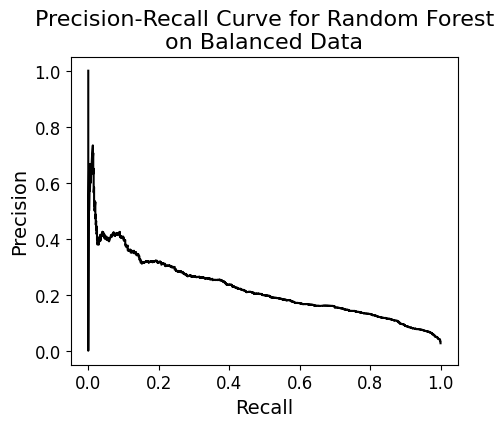

Area under PRC is 0.22252515732251454
[[24534  6309]
 [  104   737]]


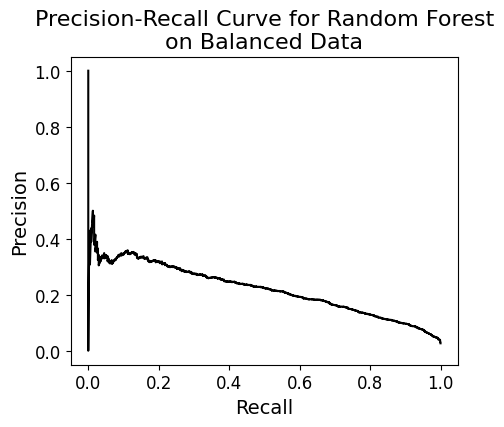

Area under PRC is 0.21995320090262255
[np.float64(0.8526200873362445), np.float64(0.848314606741573), np.float64(0.8944444444444445), np.float64(0.8761792452830188), np.float64(0.8763376932223543)]
for recall
mean of  0.8695792154055271  with standard deviation of  0.017013598316896934
upper bound:  0.886592813722424 lower bound:  0.8525656170886301
[np.float64(0.2388785228164024), np.float64(0.22083566942869098), np.float64(0.2521978776187668), np.float64(0.22252515732251454), np.float64(0.21995320090262255)]
for AUPRC
mean of  0.23087808561779943  with standard deviation of  0.01271625075558551
upper bound:  0.24359433637338496 lower bound:  0.2181618348622139


In [56]:
#trying different parameters (same ones that we tried when we were doing the imbalanced)

rus = RandomUnderSampler(sampling_strategy="majority")
rfclf = RandomForestClassifier(min_samples_leaf=10) #10 minimum samples per leaf
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0) #5 fold cross validation

recall_sc = []
area_sc = []
thresholds_recall_2 = []
thresholds_recall_07 = []

for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    rfclf.fit(X_train_res, y_train_res)

    y_pred = rfclf.predict(X_test_fold)
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)

    confmatrix = confusion_matrix(y_true = y_test_fold, y_pred=y_pred)
    print(confmatrix)

    y_pred_proba = rfclf.predict_proba(X_test_fold)[:, 1]
    precision, rec, threshold = precision_recall_curve(y_test_fold, y_pred_proba, pos_label = 1)
    auprc = average_precision_score(y_test_fold, y_pred_proba)
    area_sc.append(auprc)
    
    plt.figure(figsize=(5, 4))
    plt.plot(rec, precision, color = "black")
    plt.xlabel("Recall", fontsize = 14)
    plt.ylabel("Precision", fontsize = 14)
    wrapped_title = textwrap.fill("Precision-Recall Curve for Random Forest on Balanced Data", width=40)
    plt.title(wrapped_title, fontsize=16)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()

    print("Area under PRC is", auprc)

    recall_1_indices = rec[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_2.extend(recall_1_threshold.tolist())  # Add all values as scalars

    recall_1_indices = ((rec[:-1] < 1) & (rec[:-1] > 0.7))
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_07.extend(recall_1_threshold.tolist())  # Add all values as scalars

print(recall_sc)
print("for recall")
print("mean of ",np.array(recall_sc).mean(), " with standard deviation of ", np.array(recall_sc).std())
print("upper bound: ",np.array(recall_sc).mean() + np.array(recall_sc).std(),"lower bound: ", np.array(recall_sc).mean() - np.array(recall_sc).std())
print(area_sc)
print("for AUPRC")
print("mean of ",np.array(area_sc).mean(), " with standard deviation of ", np.array(area_sc).std())
print("upper bound: ",np.array(area_sc).mean() + np.array(area_sc).std(),"lower bound: ", np.array(area_sc).mean() - np.array(area_sc).std())

In [57]:
print(thresholds_recall_07[-1])
print(thresholds_recall_2[-1])

0.7149265159108869
0.014079252510177704


In [58]:
#already by just printing this, we see that there are different thresholds that we can use to get class 1 to have 100% recall. 
#in the imbalanced, we were not able to do this, as the only value we could use was 0. 
#so balancing has been useful.
# but the 4th and the 5th are still 0.
print(thresholds_recall_2)
#print(len(thresholds_recall_1))

#we can find the first and last thresholds:
high = ([float(thresholds_recall_2[-1])])
low = ([float(thresholds_recall_2[0])])
avghigh = np.array(high).mean()
avglow = np.array(low).mean()
print(avghigh, avglow)

#classifying with these new thresholds (avglow):
#one is going to give us a precision of 0, since everything is classified as class 1.

#looking at the 0.9 threshold:
high = ([float(thresholds_recall_07[-1])])
low = ([float(thresholds_recall_07[0])])
avghigh09 = np.array(high).mean()
avglow09 = np.array(low).mean()
print(avghigh09, avglow09)

[0.0, 6.211180124223603e-05, 0.0002777777777777778, 0.0002941176470588235, 0.0004, 0.00042975886006576543, 0.0004499245286646861, 0.000462111801242236, 0.0005531177011819661, 0.000562111801242236, 0.0005644544431946006, 0.000588235294117647, 0.0006499245286646861, 0.0006503470953598831, 0.0006864510345152995, 0.000727702306442464, 0.0008122156372244514, 0.0008297588600657655, 0.0008388319868962518, 0.0008499245286646862, 0.0009610983981693363, 0.0009712027103331452, 0.0010122156372244515, 0.001038159822782333, 0.0010531177011819661, 0.001062229503642608, 0.0010715855676992428, 0.0010749245286646861, 0.0012381598227823331, 0.0012622295036426078, 0.0012674034154676805, 0.0012903225806451613, 0.0012959445420582172, 0.0013159376005601109, 0.0013297588600657652, 0.0013333333333333333, 0.0013448275862068964, 0.0013527023064424637, 0.0013664596273291927, 0.0013760504201680674, 0.0013954451345755694, 0.0014169919632606197, 0.0014195778645906525, 0.0014226829185732706, 0.001438159822782333, 0.0

In [59]:
#actually using these thresholds to classify:
rus = RandomUnderSampler(sampling_strategy="majority")
rfclf = RandomForestClassifier(min_samples_leaf=10)
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=0)

precs = []
for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    rfclf.fit(X_train_res, y_train_res)

    y_pred_proba = rfclf.predict_proba(X_test_fold)[:, 1]
    y_pred = []
    for i in range(len(y_pred_proba)):
        if y_pred_proba[i] > avghigh09: #0.700
            y_pred.append(1)
        else:
            y_pred.append(0)
 
    #confusion matrix
    confm1 = confusion_matrix(y_test_fold, y_pred)
    print(confm1)
    #confmatrices.append(confm1)

    #looking at recall
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)
    print("recall for class 1 is", recall)

    #looking at precision:
    precision = confm1[1, 1]/confm1[:, 1].sum()
    print("Precision for class 1 is ", precision)
    precs.append(precision)

    print("---------\n")

print("average precision of ", np.mean(np.array(precs)), "with an std of ", np.std(np.array(precs)))

[[27641  3127]
 [  282   634]]
recall for class 1 is 0.6921397379912664
Precision for class 1 is  0.16857218824780643
---------

[[27680  3114]
 [  287   603]]
recall for class 1 is 0.6775280898876405
Precision for class 1 is  0.162227602905569
---------

[[27806  2978]
 [  263   637]]
recall for class 1 is 0.7077777777777777
Precision for class 1 is  0.17621023513139697
---------

[[27792  3044]
 [  267   581]]
recall for class 1 is 0.6851415094339622
Precision for class 1 is  0.16027586206896552
---------

[[27758  3085]
 [  248   593]]
recall for class 1 is 0.7051129607609988
Precision for class 1 is  0.1612289287656335
---------

average precision of  0.1657029634238743 with an std of  0.006003061815403246


In [60]:
#actually using these thresholds to classify:
rus = RandomUnderSampler(sampling_strategy="majority")
rfclf = RandomForestClassifier(min_samples_leaf=10)
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=0)

precs = []
for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    rfclf.fit(X_train_res, y_train_res)

    y_pred_proba = rfclf.predict_proba(X_test_fold)[:, 1]
    y_pred = []
    for i in range(len(y_pred_proba)):
        if y_pred_proba[i] > avghigh:
            y_pred.append(1)
        else:
            y_pred.append(0)
 
    #confusion matrix
    confm1 = confusion_matrix(y_test_fold, y_pred)
    print(confm1)
    #confmatrices.append(confm1)

    #looking at recall
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)
    print("recall for class 1 is", recall)

    #looking at precision:
    precision = confm1[1, 1]/confm1[:, 1].sum()
    print("Precision for class 1 is ", precision)
    precs.append(precision)

    print("---------\n")

print("average precision of ", np.mean(np.array(precs)), "with an std of ", np.std(np.array(precs)))

[[ 4884 25884]
 [    4   912]]
recall for class 1 is 0.9956331877729258
Precision for class 1 is  0.03403493058665472
---------

[[ 4095 26699]
 [    2   888]]
recall for class 1 is 0.9977528089887641
Precision for class 1 is  0.03218907456410628
---------

[[ 3681 27103]
 [    0   900]]
recall for class 1 is 1.0
Precision for class 1 is  0.032139413634253475
---------

[[ 3969 26867]
 [    0   848]]
recall for class 1 is 1.0
Precision for class 1 is  0.030597149558001083
---------

[[ 3663 27180]
 [    0   841]]
recall for class 1 is 1.0
Precision for class 1 is  0.030013204382427466
---------

average precision of  0.03179475454508861 with an std of  0.0014071848172520717


We cannot say that the recall increased or decreased because the standard deviations overlap, so there is no significant difference. Same with the area.

In [61]:
#trying different parameters (same ones that we tried when we were doing the imbalanced)

rus = RandomUnderSampler(sampling_strategy="majority")
rfclf = ensemble.RandomForestClassifier(min_samples_leaf=1000) #1000 minimum samples per leaf
kf = KFold(n_splits=5, shuffle=True, random_state=0) #5 fold cross validation

recall_sc = []
area_sc = []

thresholds_recall_2 = []
thresholds_recall_07 = []

for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    rfclf.fit(X_train_res, y_train_res)

    y_pred = rfclf.predict(X_test_fold)
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)

    y_pred_proba = rfclf.predict_proba(X_test_fold)[:, 1]
    precision, rec, threshold = precision_recall_curve(y_test_fold, y_pred_proba, pos_label = 1)
    auprc = average_precision_score(y_test_fold, y_pred_proba)
    area_sc.append(auprc)
    #plt.figure(figsize=(2.5, 2))
    #plt.plot(rec, precision, color = "black")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision Recall Curve for Random Forest on Balanced Data")
    #plt.show()
    print("Area under PRC is", auprc)

    recall_1_indices = rec[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_2.extend(recall_1_threshold.tolist())  # Add all values as scalars

    recall_1_indices = ((rec[:-1] < 1) & (rec[:-1] > 0.7))
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_07.extend(recall_1_threshold.tolist())

print(recall_sc)
print("for recall")
print("mean of ",np.array(recall_sc).mean(), " with standard deviation of ", np.array(recall_sc).std())
print("upper bound: ",np.array(recall_sc).mean() + np.array(recall_sc).std(),"lower bound: ", np.array(recall_sc).mean() - np.array(recall_sc).std())
print(area_sc)
print("for AUPRC")
print("mean of ",np.array(area_sc).mean(), " with standard deviation of ", np.array(area_sc).std())
print("upper bound: ",np.array(area_sc).mean() + np.array(area_sc).std(),"lower bound: ", np.array(area_sc).mean() - np.array(area_sc).std())

Area under PRC is 0.21716477331733222
Area under PRC is 0.20692223875529475
Area under PRC is 0.2323042246084352
Area under PRC is 0.20642939470107904
Area under PRC is 0.21496542547489345
[np.float64(0.7903930131004366), np.float64(0.8179775280898877), np.float64(0.8366666666666667), np.float64(0.8337264150943396), np.float64(0.8323424494649228)]
for recall
mean of  0.8222212144832508  with standard deviation of  0.017172788969233636
upper bound:  0.8393940034524845 lower bound:  0.8050484255140171
[np.float64(0.21716477331733222), np.float64(0.20692223875529475), np.float64(0.2323042246084352), np.float64(0.20642939470107904), np.float64(0.21496542547489345)]
for AUPRC
mean of  0.21555721137140696  with standard deviation of  0.009394431409794018
upper bound:  0.22495164278120097 lower bound:  0.20616277996161295


In [62]:
print(thresholds_recall_07[-1])
print(thresholds_recall_07[-1])

0.5764490221764856
0.5764490221764856


#### Feature Importance

With random forests, we can also check for feature importance. This is important for the context of the problem as we really want to see which factors are the ones that influence the prediction the most.

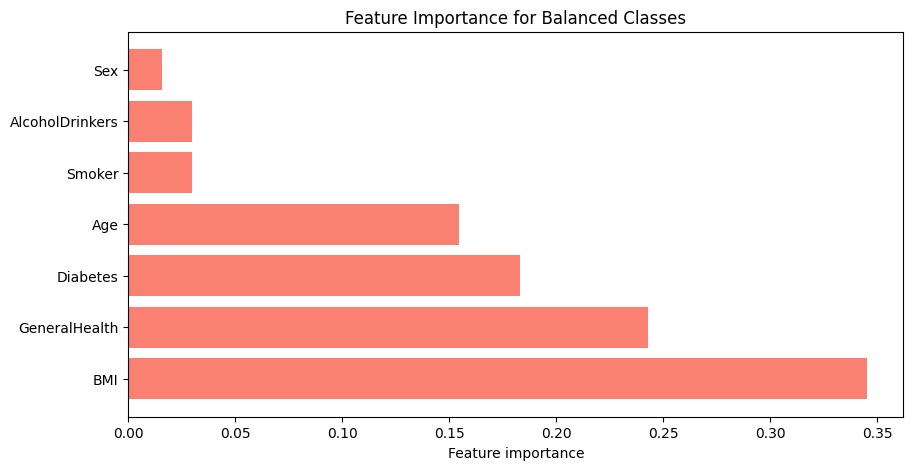

In [63]:
rus = RandomUnderSampler(sampling_strategy="majority")
random_forest = ensemble.RandomForestClassifier(oob_score=True, min_samples_leaf = 1) #but this was not the optimal parameter we saw for balanced data
#setting up k-fold cross validation, since we need to perform undersampling and we use crossval for this
k = 5
kf = KFold(n_splits = k, shuffle = True, random_state=0)

modelfeatureimportances = []
for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)
    
    #recallclasses1s = []
    #for m in number_trees:
    #    random_forest.set_params(n_estimators = m)
    #    model = random_forest.fit(X_train_res, y_train_res)
    #    y_pred = model.predict(X_test)
    #    cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
    #    recallclass = cm[1, 1] / cm[1, :].sum() 
    #    recallclasses1s.append(recallclass)
    
    #plt.plot(number_trees, recallclasses1s)
    #plt.xlabel("Number of Trees")
    #plt.ylabel("Recall of Class 1")
    #plt.title("Number of Trees in Random Forest vs Recall of Class 1")
    #plt.show()

    #there are many fluctuations in the value of m and the recall, so we will say we are choosing m = 50, like we had for imbalanced classes
    m = 50
    random_forest.set_params(n_estimators=m) #min_samples_leaf = 1 here
    model = random_forest.fit(X_train_res, y_train_res)
    modelfeatureimportances.append(model.feature_importances_)

#print(modelfeatureimportances)
avgfeatureimportances = []
for i in range(7):
    sums = sum(modelfeatureimportances[j][i] for j in range(5))
    avg = sums / 5
    avgfeatureimportances.append(avg)
#print(avgfeatureimportances)

fig, ax = plt.subplots(figsize=(10,5))
inds = np.argsort(avgfeatureimportances)
#print("inds ", inds)
inds = np.flip(inds)
reorder = [avgfeatureimportances[i] for i in inds]
#print(reorder)
ax.barh(np.arange(7), reorder, color='salmon')
ax.set_yticks(np.arange(7))
_ = ax.set_yticklabels(X.columns[inds])
_ = ax.set_xlabel('Feature importance')
_ = ax.set_title('Feature Importance for Balanced Classes')

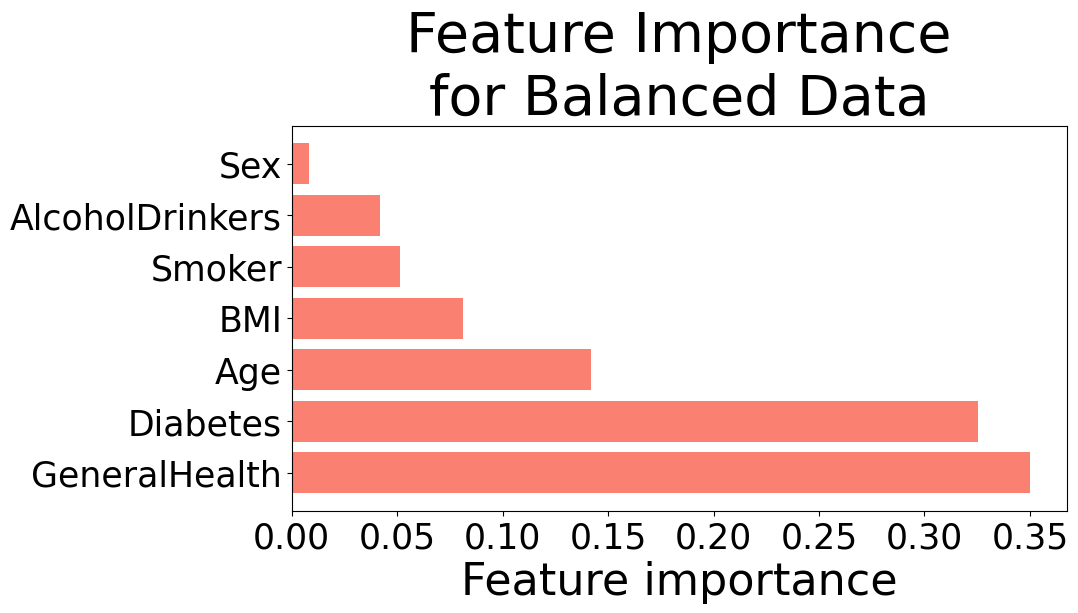

In [64]:
rus = RandomUnderSampler(sampling_strategy="majority")
random_forest = ensemble.RandomForestClassifier(oob_score=True, min_samples_leaf = 10)
#setting up k-fold cross validation, since we need to perform undersampling and we use crossval for this
k = 5
kf = KFold(n_splits = k, shuffle = True, random_state=0)

modelfeatureimportances = []
for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)
    
    #recallclasses1s = []
    #for m in number_trees:
    #    random_forest.set_params(n_estimators = m)
    #    model = random_forest.fit(X_train_res, y_train_res)
    #    y_pred = model.predict(X_test)
    #    cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
    #    recallclass = cm[1, 1] / cm[1, :].sum() 
    #    recallclasses1s.append(recallclass)
    
    #plt.plot(number_trees, recallclasses1s)
    #plt.xlabel("Number of Trees")
    #plt.ylabel("Recall of Class 1")
    #plt.title("Number of Trees in Random Forest vs Recall of Class 1")
    #plt.show()

    #there are many fluctuations in the value of m and the recall, so we will say we are choosing m = 50, like we had for imbalanced classes
    m = 50
    random_forest.set_params(n_estimators=m) #min_samples_leaf = 1 here
    model = random_forest.fit(X_train_res, y_train_res)
    modelfeatureimportances.append(model.feature_importances_)

#print(modelfeatureimportances)
avgfeatureimportances = []
for i in range(7):
    sums = sum(modelfeatureimportances[j][i] for j in range(5))
    avg = sums / 5
    avgfeatureimportances.append(avg)
#print(avgfeatureimportances)

fig, ax = plt.subplots(figsize=(10,5))
inds = np.argsort(avgfeatureimportances)
#print("inds ", inds)
inds = np.flip(inds)
reorder = [avgfeatureimportances[i] for i in inds]
#print(reorder)

wrapped_title = textwrap.fill("Feature Importance for Balanced Data", width=20)
ax.barh(np.arange(7), model.feature_importances_[inds], color='salmon')
ax.set_yticks(np.arange(7))
_ = ax.set_yticklabels(X.columns[inds], fontsize=25)
_ = ax.set_xlabel('Feature importance', fontsize=32)
_ = ax.set_title(wrapped_title, fontsize=40)
plt.xticks(fontsize=25)
plt.show()

We can see that the feature importances are the same.

When we look at the confusion matrices of all thse models, we see that the elements are not centered in the diagonal. In fact, they are usually centered in the top row, which is why the precision tends to be low. A good model with high precision and high recall is going to have most (if not all) elements on the leading diagonal.

## Logistic Regression & Neural Networks

### Logistic Regression

In [65]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

[[28530  6174]
 [  134   807]]


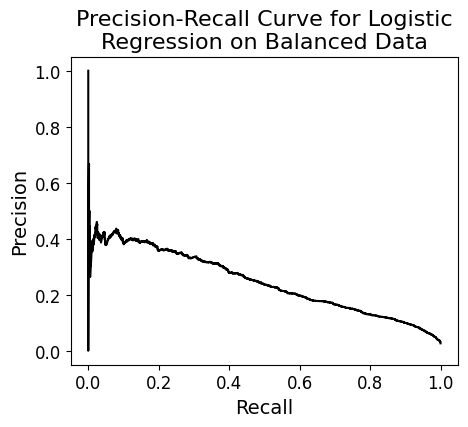

Area under PRC is 0.2458363232184065
[[ 0.04938654  0.10906409 -1.14966501 -0.33049742  0.78311585  1.78195286
   0.01278019]]
---------

[[28695  5982]
 [  177   791]]


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


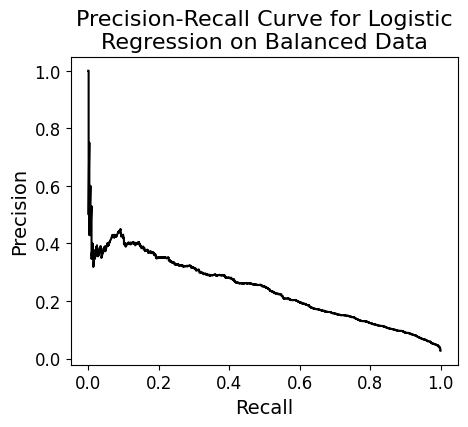

Area under PRC is 0.24035233990586818
[[ 0.04626899  0.31851626 -1.17282455 -0.33110549  0.74701569  1.88801068
   0.01967187]]
---------

[[28654  5954]
 [  149   887]]


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


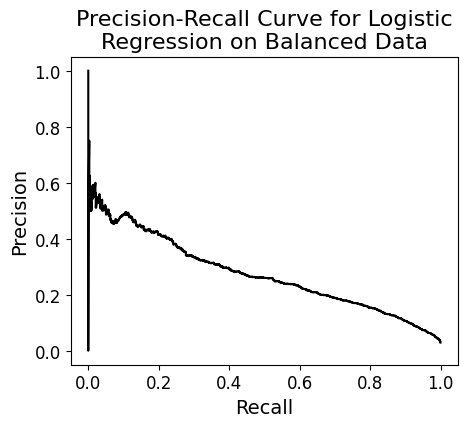

Area under PRC is 0.2754905973929687
[[ 0.04735535  0.20295495 -1.14182831 -0.39155139  0.7827221   1.81041706
   0.02119948]]
---------

[[28599  6047]
 [  136   862]]


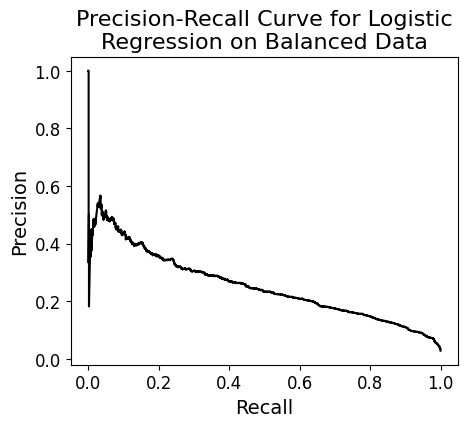

Area under PRC is 0.2528548109208497
[[ 0.04769074  0.28790218 -1.03893798 -0.34102804  0.80410866  1.82483206
   0.02514111]]
---------

[[28542  6134]
 [  148   820]]


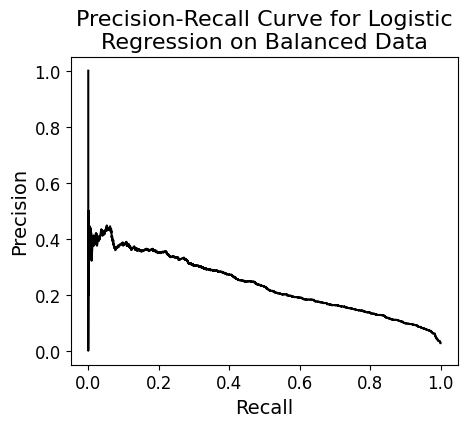

Area under PRC is 0.236519537769853
[[ 0.05159963  0.17485898 -1.12521925 -0.26538836  0.86562635  1.80942984
   0.02472894]]
---------

AUPRC
mean of  0.2502107218415892  with standard deviation of  0.013782850894815027
upper bound:  0.2639935727364042 lower bound:  0.2364278709467742
Recall
mean of  0.8483519118231447  with standard deviation of  0.016482292825237926
upper bound:  0.8648342046483827 lower bound:  0.8318696189979068
LogReg Coefs
[[ 0.04846025  0.21865929 -1.12569502 -0.33191414  0.79651773  1.8229285
   0.02070432]]
[[0.00186163 0.07608179 0.04600662 0.04016965 0.03912545 0.03537532
  0.00447181]]


In [67]:
rus = RandomUnderSampler(sampling_strategy="majority")
logreg = LogisticRegression(random_state=0)
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=0)

prc_area = []
recall_sc = []
confmatrices = []
coefs = []

for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    logreg.fit(X_train_res, y_train_res)

    y_pred = logreg.predict(X_test_fold)
    y_pred_proba = logreg.predict_proba(X_test_fold)[:, 1]

    #confusion matrix
    confm1 = confusion_matrix(y_test_fold, y_pred)
    print(confm1)
    confmatrices.append(confm1)

    #looking at recall
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)
    #print("recall for class 1 is", recall)

    #looking at PRC
    precision, rec, threshold = precision_recall_curve(y_test_fold, y_pred_proba, pos_label = 1)
    auprc = average_precision_score(y_test_fold, y_pred_proba)
    prc_area.append(auprc)
    plt.figure(figsize=(5, 4))
    plt.plot(rec, precision, color = "black")
    plt.xlabel("Recall", fontsize = 14)
    plt.ylabel("Precision", fontsize = 14)
    wrapped_title = textwrap.fill("Precision-Recall Curve for Logistic Regression on Balanced Data", width=40)
    plt.title(wrapped_title, fontsize=16)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    print("Area under PRC is", auprc)

    #the coefficients (for interpretability)
    print(logreg.coef_)
    coefs.append(logreg.coef_)

    print("---------\n")


print("AUPRC")
print("mean of ",np.array(prc_area).mean(), " with standard deviation of ", np.array(prc_area).std())
print("upper bound: ",np.array(prc_area).mean() + np.array(prc_area).std(),"lower bound: ", np.array(prc_area).mean() - np.array(prc_area).std())
print("Recall")
print("mean of ",np.array(recall_sc).mean(), " with standard deviation of ", np.array(recall_sc).std())
print("upper bound: ",np.array(recall_sc).mean() + np.array(recall_sc).std(),"lower bound: ", np.array(recall_sc).mean() - np.array(recall_sc).std())

print("LogReg Coefs")
coef_arr = np.array(coefs)
print(coef_arr.mean(axis=0))
print(coef_arr.std(axis=0))

In [68]:
X_train.columns

Index(['Age', 'Sex', 'GeneralHealth', 'AlcoholDrinkers', 'Smoker', 'Diabetes',
       'BMI'],
      dtype='object')

Let's look at the thresholds.

In [69]:
rus = RandomUnderSampler(sampling_strategy="majority")
logreg = LogisticRegression(random_state=0)
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=0)

prc_area = []
recall_sc = []
prc_thresholds = []
thresholds_recall_1 = []
thresholds_recall_09 = []
thresholds_recall_07 = []

for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    logreg.fit(X_train_res, y_train_res)

    y_pred = logreg.predict(X_test_fold)
    y_pred_proba = logreg.predict_proba(X_test_fold)[:, 1]

    #confusion matrix
    confm1 = confusion_matrix(y_test_fold, y_pred)
    print(confm1)

    #looking at recall
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)
    print("recall for class 1 is", recall)

    #looking at PRC
    precision, rec, threshold = precision_recall_curve(y_test_fold, y_pred_proba, pos_label = 1)
    auprc = average_precision_score(y_test_fold, y_pred_proba)
    prc_area.append(auprc)
    prc_thresholds.append(threshold)
    #plt.figure(figsize=(2.5*0.7, 2*0.7))
    #plt.plot(precision, rec, color = "pink")
    #plt.xlabel("Precision")
    #plt.ylabel("Recall")
    #plt.title("Precision Recall Curve")
    #plt.show()
    print("Area under PRC is", auprc)

    #to deal with the thresholds:
    recall_1_indices = rec[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_1.append(recall_1_threshold)

    recall_1_indices = ((rec[:-1] < 1) & (rec[:-1] > 0.7))
    if recall_1_indices.any(): 
        recall_1_threshold = threshold[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

    print("---------\n")

print("AUPRC")
print("mean of ",np.array(prc_area).mean(), " with standard deviation of ", np.array(prc_area).std())
print("upper bound: ",np.array(prc_area).mean() + np.array(prc_area).std(),"lower bound: ", np.array(prc_area).mean() - np.array(prc_area).std())
print("Recall")
print("mean of ",np.array(recall_sc).mean(), " with standard deviation of ", np.array(recall_sc).std())
print("upper bound: ",np.array(recall_sc).mean() + np.array(recall_sc).std(),"lower bound: ", np.array(recall_sc).mean() - np.array(recall_sc).std())

[[28533  6171]
 [  135   806]]
recall for class 1 is 0.8565356004250797
Area under PRC is 0.2489651679229322
---------

[[28669  6008]
 [  172   796]]
recall for class 1 is 0.8223140495867769
Area under PRC is 0.24107140092768242
---------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

[[28629  5979]
 [  148   888]]
recall for class 1 is 0.8571428571428571
Area under PRC is 0.27584743633271713
---------

[[28510  6136]
 [  126   872]]
recall for class 1 is 0.87374749498998
Area under PRC is 0.2541339905712483
---------

[[28638  6038]
 [  147   821]]
recall for class 1 is 0.8481404958677686
Area under PRC is 0.23671225239757543
---------

AUPRC
mean of  0.25134604963043106  with standard deviation of  0.013663642194867192
upper bound:  0.26500969182529827 lower bound:  0.23768240743556387
Recall
mean of  0.8515760996024925  with standard deviation of  0.016823954086332017
upper bound:  0.8684000536888244 lower bound:  0.8347521455161605


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

In [70]:
#already by just printing this, we see that there are different thresholds that we can use to get class 1 to have 100% recall. 
#in the imbalanced, we were not able to do this, as the only value we could use was 0. 
#so balancing has been useful.

print(thresholds_recall_1)
#print(len(thresholds_recall_1))

#we can find the first and last thresholds:
high = ([float(thresholds_recall_1[i][-1]) for i in range(5)])
low = ([float(thresholds_recall_1[i][0]) for i in range(5)])
avghigh = np.array(high).mean()
avglow = np.array(low).mean()
print(avghigh, avglow)

#classifying with these new thresholds (avglow):
#one is going to give us a precision of 0, since everything is classified as class 1.

#looking at the 0.7 threshold:
high = ([float(thresholds_recall_09[i][-1]) for i in range(5)])
low = ([float(thresholds_recall_09[i][0]) for i in range(5)])
avghigh09 = np.array(high).mean()
avglow09 = np.array(low).mean()
print(avghigh09, avglow09)

[array([0.00210974, 0.00214459, 0.00214652, ..., 0.02158625, 0.02158995,
       0.02159063]), array([0.00162089, 0.00167376, 0.0017047 , ..., 0.01166602, 0.01166663,
       0.0116697 ]), array([0.00185538, 0.00193454, 0.00195087, ..., 0.00948145, 0.00948532,
       0.00948582]), array([0.00192567, 0.00200862, 0.00201769, ..., 0.02863656, 0.02865824,
       0.0286692 ]), array([0.00195681, 0.0019879 , 0.0020061 , ..., 0.01182217, 0.01182261,
       0.01182911])]
0.016648891710931694 0.0018937001617273185
0.7097815721563606 0.016651483496773825


In [71]:
avghigh

np.float64(0.016648891710931694)

In [72]:
#classifying with this new threshold (avghigh):
rus = RandomUnderSampler(sampling_strategy="majority")
logreg = LogisticRegression(random_state=0)
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=0)

precs = []

for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    logreg.fit(X_train_res, y_train_res)

    y_pred_proba = logreg.predict_proba(X_test_fold)[:, 1]
    y_pred = []
    for i in range(len(y_pred_proba)):
        if y_pred_proba[i] > avghigh:
            y_pred.append(1)
        else:
            y_pred.append(0)
 
    #confusion matrix
    confm1 = confusion_matrix(y_test_fold, y_pred)
    print(confm1)

    #looking at recall
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)
    print("recall for class 1 is", recall)

    #looking at precision:
    precision = confm1[1, 1]/confm1[:, 1].sum()
    print("Precision for class 1 is ", precision)
    precs.append(precision)

    print("---------\n")

print("the average precision is ", np.mean(np.array(precs)), "with a std of ", np.std(np.array(precs)))

[[ 4280 30424]
 [    0   941]]
recall for class 1 is 1.0
Precision for class 1 is  0.030001594133588393
---------

[[ 5034 29643]
 [    1   967]]
recall for class 1 is 0.9989669421487604
Precision for class 1 is  0.031590983338778175
---------

[[ 4415 30193]
 [    1  1035]]
recall for class 1 is 0.999034749034749
Precision for class 1 is  0.033143332906366084
---------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 4453 30193]
 [    0   998]]
recall for class 1 is 1.0
Precision for class 1 is  0.03199640922060851
---------

[[ 4567 30109]
 [    2   966]]
recall for class 1 is 0.9979338842975206
Precision for class 1 is  0.031086082059533386
---------

the average precision is  0.03156368033177491 with a std of  0.0010345545323517749


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that the recall is very high, but the precision is low. We are again classifying most things as class 1 but this does not make sense in the context.

In [73]:
#classifying with this new threshold (avghigh09):
rus = RandomUnderSampler(sampling_strategy="majority")
logreg = LogisticRegression(random_state=0)
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=0)

precs = []
for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    logreg.fit(X_train_res, y_train_res)

    y_pred_proba = logreg.predict_proba(X_test_fold)[:, 1]
    y_pred = []
    for i in range(len(y_pred_proba)):
        if y_pred_proba[i] > avghigh09:
            y_pred.append(1)
        else:
            y_pred.append(0)
 
    #confusion matrix
    confm1 = confusion_matrix(y_test_fold, y_pred)
    print(confm1)
    #confmatrices.append(confm1)

    #looking at recall
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recall_sc.append(recall)
    print("recall for class 1 is", recall)

    #looking at precision:
    precision = confm1[1, 1]/confm1[:, 1].sum()
    print("Precision for class 1 is ", precision)
    precs.append(precision)

    print("---------\n")

print("the average precision is ", np.mean(np.array(precs)), "with a std of ", np.std(np.array(precs)))

[[31322  3382]
 [  276   665]]
recall for class 1 is 0.7066950053134963
Precision for class 1 is  0.1643192488262911
---------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

[[31457  3220]
 [  325   643]]
recall for class 1 is 0.6642561983471075
Precision for class 1 is  0.1664509448615066
---------

[[31253  3355]
 [  291   745]]
recall for class 1 is 0.7191119691119691
Precision for class 1 is  0.18170731707317073
---------

[[31281  3365]
 [  296   702]]
recall for class 1 is 0.7034068136272545
Precision for class 1 is  0.17260880255716746
---------

[[31311  3365]
 [  301   667]]
recall for class 1 is 0.6890495867768595
Precision for class 1 is  0.1654265873015873
---------

the average precision is  0.17010258012394466 with a std of  0.006474524544838174


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Neural Network

To compare how the balanced version performs against the imbalanced version, I am going to be doing the same neural network layers.

In [74]:
#looking at a neural network with hidden layer size 8, using 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_09 = []

rus = RandomUnderSampler(sampling_strategy="majority")
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)

auprc8 = []
recall8 = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    clf = MLPClassifier(hidden_layer_sizes=[8], activation="logistic", solver="sgd").fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    recall8.append(recall)

    #precision of class 1
    precision = confm1[1,1] / confm1[:, 1].sum()
    print(f"the precision for class 1 is {precision}")

    y_pred_probas = clf.predict_proba(X_test)[:, 1]

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "black")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    auprc8.append(auprc)

    #recall_1_indices = recall[:-1] == 1 
    #if recall_1_indices.any(): 
    #    recall_1_threshold = prc_thresholds[recall_1_indices]
    #    thresholds_recall_2.append(recall_1_threshold)

    #recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    #if recall_1_indices.any(): 
    #    recall_1_threshold = prc_thresholds[recall_1_indices]
    #    thresholds_recall_09.append(recall_1_threshold)
    
    print("-----------------------\n")

print("AUPRC")
print(auprc8)
print("mean of ",np.array(auprc8).mean(), " with standard deviation of ", np.array(auprc8).std())
print("upper bound: ",np.array(auprc8).mean() + np.array(auprc8).std(),"lower bound: ", np.array(auprc8).mean() - np.array(auprc8).std())
print("Recall")
print(recall8)
print("mean of ",np.array(recall8).mean(), " with standard deviation of ", np.array(recall8).std())
print("upper bound: ",np.array(recall8).mean() + np.array(recall8).std(),"lower bound: ", np.array(recall8).mean() - np.array(recall8).std())

/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[38412  7730]
 [  272  1112]]
the recall for class 1 is 0.8034682080924855
the precision for class 1 is 0.12576340194526126
Area Under the PRC: 0.2376788268864545
-----------------------

[[43217  2993]
 [ 1311     5]]
the recall for class 1 is 0.003799392097264438
the precision for class 1 is 0.001667778519012675
Area Under the PRC: 0.01656501957320934
-----------------------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[36116 10045]
 [  182  1183]]
the recall for class 1 is 0.8666666666666667
the precision for class 1 is 0.10536159600997506
Area Under the PRC: 0.2160598830687142
-----------------------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[33690 12554]
 [  115  1167]]
the recall for class 1 is 0.9102964118564743
the precision for class 1 is 0.08505210990452591
Area Under the PRC: 0.2142215234658856
-----------------------

[[35496 10770]
 [  159  1101]]
the recall for class 1 is 0.8738095238095238
the precision for class 1 is 0.09274703057872126
Area Under the PRC: 0.23121840488320985
-----------------------

AUPRC
[np.float64(0.2376788268864545), np.float64(0.01656501957320934), np.float64(0.2160598830687142), np.float64(0.2142215234658856), np.float64(0.23121840488320985)]
mean of  0.18314873157549472  with standard deviation of  0.08376517197435503
upper bound:  0.26691390354984973 lower bound:  0.09938355960113969
Recall
[np.float64(0.8034682080924855), np.float64(0.003799392097264438), np.float64(0.8666666666666667), np.float64(0.9102964118564743), np.float64(0.8738095238095238)]
mean of  0.691608040504483  with standard deviation of  0.3456185587590792
upper bound:  1.0372265992635623 lower bound:  0.345989481745

/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


In [75]:
#looking at a neural network with hidden layer size 100, using 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_09 = []

rus = RandomUnderSampler(sampling_strategy="majority")
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)
recall100 = []
auprc100 = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    clf = MLPClassifier(hidden_layer_sizes=[100], activation="logistic", solver="sgd").fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    recall100.append(recall)

    #precision of class 1
    precision = confm1[1,1] / confm1[:, 1].sum()
    print(f"the precision for class 1 is {precision}")


    y_pred_probas = clf.predict_proba(X_test)[:, 1]

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    auprc100.append(auprc)

print("AUPRC")
print(auprc100)
print("mean of ",np.array(auprc100).mean(), " with standard deviation of ", np.array(auprc100).std())
print("upper bound: ",np.array(auprc100).mean() + np.array(auprc100).std(),"lower bound: ", np.array(auprc100).mean() - np.array(auprc100).std())
print("Recall")
print(recall100)
print("mean of ",np.array(recall100).mean(), " with standard deviation of ", np.array(recall100).std())
print("upper bound: ",np.array(recall100).mean() + np.array(recall100).std(),"lower bound: ", np.array(recall100).mean() - np.array(recall100).std())

/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[38937  7205]
 [  280  1104]]
the recall for class 1 is 0.7976878612716763
the precision for class 1 is 0.13286797448549764
Area Under the PRC: 0.2563115924138089


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[38597  7613]
 [  221  1095]]
the recall for class 1 is 0.8320668693009119
the precision for class 1 is 0.12574644005512173
Area Under the PRC: 0.26056280756641315


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[37502  8659]
 [  196  1169]]
the recall for class 1 is 0.8564102564102564
the precision for class 1 is 0.11894586894586895
Area Under the PRC: 0.2458639804070439


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[38308  7936]
 [  217  1065]]
the recall for class 1 is 0.8307332293291732
the precision for class 1 is 0.11832018664592824
Area Under the PRC: 0.23365391323851417
[[35842 10424]
 [  155  1105]]
the recall for class 1 is 0.876984126984127
the precision for class 1 is 0.09584525977968601
Area Under the PRC: 0.2422916730268317
AUPRC
[np.float64(0.2563115924138089), np.float64(0.26056280756641315), np.float64(0.2458639804070439), np.float64(0.23365391323851417), np.float64(0.2422916730268317)]
mean of  0.2477367933305224  with standard deviation of  0.009690387975224707
upper bound:  0.2574271813057471 lower bound:  0.2380464053552977
Recall
[np.float64(0.7976878612716763), np.float64(0.8320668693009119), np.float64(0.8564102564102564), np.float64(0.8307332293291732), np.float64(0.876984126984127)]
mean of  0.8387764686592292  with standard deviation of  0.026716143825928778
upper bound:  0.865492612485158 lower bound:  0.8120603248333004


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


In [76]:
#looking at a neural network with hidden layer size [10, 10], using 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_09 = []

rus = RandomUnderSampler(sampling_strategy="majority")
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)

recall10 = []
auprc10 = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    clf = MLPClassifier(hidden_layer_sizes=[10,10], activation="logistic", solver="sgd").fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    recall10.append(recall)

    #precision of class 1
    precision = confm1[1,1] / confm1[:, 1].sum()
    print(f"the precision for class 1 is {precision}")

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    auprc10.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

    print("---------------\n")

print("AUPRC")
print(auprc10)
print("mean of ",np.array(auprc10).mean(), " with standard deviation of ", np.array(auprc10).std())
print("upper bound: ",np.array(auprc10).mean() + np.array(auprc10).std(),"lower bound: ", np.array(auprc10).mean() - np.array(auprc10).std())
print("Recall")
print(recall10)
print("mean of ",np.array(recall10).mean(), " with standard deviation of ", np.array(recall10).std())
print("upper bound: ",np.array(recall10).mean() + np.array(recall10).std(),"lower bound: ", np.array(recall10).mean() - np.array(recall10).std())

[[40781  5361]
 [ 1290    94]]
the recall for class 1 is 0.06791907514450866
the precision for class 1 is 0.017231897341888177
Area Under the PRC: 0.02058894951936104
---------------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[18826 27384]
 [  335   981]]
the recall for class 1 is 0.7454407294832827
the precision for class 1 is 0.034584875727128504
Area Under the PRC: 0.036939793944621796
---------------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[18562 27599]
 [  339  1026]]
the recall for class 1 is 0.7516483516483516
the precision for class 1 is 0.035842794759825325
Area Under the PRC: 0.03850430197163282
---------------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[16658 29586]
 [  245  1037]]
the recall for class 1 is 0.8088923556942278
the precision for class 1 is 0.03386343597949254
Area Under the PRC: 0.03659055181592234
---------------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[17659 28607]
 [  319   941]]
the recall for class 1 is 0.7468253968253968
the precision for class 1 is 0.03184648707188304
Area Under the PRC: 0.04426246087892513
---------------

AUPRC
[np.float64(0.02058894951936104), np.float64(0.036939793944621796), np.float64(0.03850430197163282), np.float64(0.03659055181592234), np.float64(0.04426246087892513)]
mean of  0.03537721162609263  with standard deviation of  0.007890917593917208
upper bound:  0.04326812922000983 lower bound:  0.02748629403217542
Recall
[np.float64(0.06791907514450866), np.float64(0.7454407294832827), np.float64(0.7516483516483516), np.float64(0.8088923556942278), np.float64(0.7468253968253968)]
mean of  0.6241451817591536  with standard deviation of  0.27911972461826223
upper bound:  0.9032649063774159 lower bound:  0.34502545714089133


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


The standard deviation for this is huge!

In [77]:
#looking at a neural network with hidden layer size 50, using 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_09 = []

rus = RandomUnderSampler(sampling_strategy="majority")
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)

recall50 = []
auprc50 = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    clf = MLPClassifier(hidden_layer_sizes=[50], activation="logistic", solver="sgd").fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    recall50.append(recall)

    #precision of class 1
    precision = confm1[1,1] / confm1[:, 1].sum()
    print(f"the precision for class 1 is {precision}")

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    auprc50.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print("AUPRC")
print(auprc50)
print("mean of ",np.array(auprc50).mean(), " with standard deviation of ", np.array(auprc50).std())
print("upper bound: ",np.array(auprc50).mean() + np.array(auprc50).std(),"lower bound: ", np.array(auprc50).mean() - np.array(auprc50).std())
print("Recall")
print(recall50)
print("mean of ",np.array(recall50).mean(), " with standard deviation of ", np.array(recall50).std())
print("upper bound: ",np.array(recall50).mean() + np.array(recall50).std(),"lower bound: ", np.array(recall50).mean() - np.array(recall50).std())

/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[38281  7861]
 [  249  1135]]
the recall for class 1 is 0.8200867052023122
the precision for class 1 is 0.12616718541574032
Area Under the PRC: 0.256487885640796


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[37040  9170]
 [  177  1139]]
the recall for class 1 is 0.8655015197568389
the precision for class 1 is 0.11048598312154428
Area Under the PRC: 0.2557284172527714


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[37632  8529]
 [  199  1166]]
the recall for class 1 is 0.8542124542124542
the precision for class 1 is 0.12026817947395564
Area Under the PRC: 0.24983828834421762


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[35896 10348]
 [  146  1136]]
the recall for class 1 is 0.8861154446177847
the precision for class 1 is 0.09892023685127134
Area Under the PRC: 0.23088358719332466
[[37731  8535]
 [  195  1065]]
the recall for class 1 is 0.8452380952380952
the precision for class 1 is 0.1109375
Area Under the PRC: 0.24431913699441024
AUPRC
[np.float64(0.256487885640796), np.float64(0.2557284172527714), np.float64(0.24983828834421762), np.float64(0.23088358719332466), np.float64(0.24431913699441024)]
mean of  0.247451463085104  with standard deviation of  0.009382620273890151
upper bound:  0.25683408335899416 lower bound:  0.23806884281121385
Recall
[np.float64(0.8200867052023122), np.float64(0.8655015197568389), np.float64(0.8542124542124542), np.float64(0.8861154446177847), np.float64(0.8452380952380952)]
mean of  0.8542308438054971  with standard deviation of  0.02186480263476543
upper bound:  0.8760956464402625 lower bound:  0.8323660411707317


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


In [78]:
#looking at a neural network with hidden layer size [100,10], using 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_09 = []

rus = RandomUnderSampler(sampling_strategy="majority")
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)

recall10010 = []
auprc10010 = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    clf = MLPClassifier(hidden_layer_sizes=[100,10], activation="logistic", solver="sgd").fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    recall10010.append(recall)

    #precision of class 1
    precision = confm1[1,1] / confm1[:, 1].sum()
    print(f"the precision for class 1 is {precision}")

    #looking at the ROC curve
    y_pred_probas = clf.predict_proba(X_test)[:, 1]

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    auprc10010.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print("AUPRC")
print(auprc10010)
print("mean of ",np.array(auprc10010).mean(), " with standard deviation of ", np.array(auprc10010).std())
print("upper bound: ",np.array(auprc10010).mean() + np.array(auprc10010).std(),"lower bound: ", np.array(auprc10010).mean() - np.array(auprc10010).std())
print("Recall")
print(recall10010)
print("mean of ",np.array(recall10010).mean(), " with standard deviation of ", np.array(recall10010).std())
print("upper bound: ",np.array(recall10010).mean() + np.array(recall10010).std(),"lower bound: ", np.array(recall10010).mean() - np.array(recall10010).std())

/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[37612  8530]
 [  262  1122]]
the recall for class 1 is 0.8106936416184971
the precision for class 1 is 0.1162453377538334
Area Under the PRC: 0.2184673881026217


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[36288  9922]
 [  183  1133]]
the recall for class 1 is 0.8609422492401215
the precision for class 1 is 0.10248756218905472
Area Under the PRC: 0.22969042463305064


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[38330  7831]
 [  251  1114]]
the recall for class 1 is 0.8161172161172161
the precision for class 1 is 0.12453884851872554
Area Under the PRC: 0.22339226275281393


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[39366  6878]
 [  287   995]]
the recall for class 1 is 0.7761310452418096
the precision for class 1 is 0.12638130318811128
Area Under the PRC: 0.20753126027424348
[[37486  8780]
 [  230  1030]]
the recall for class 1 is 0.8174603174603174
the precision for class 1 is 0.10499490316004077
Area Under the PRC: 0.2084693840222264
AUPRC
[np.float64(0.2184673881026217), np.float64(0.22969042463305064), np.float64(0.22339226275281393), np.float64(0.20753126027424348), np.float64(0.2084693840222264)]
mean of  0.21751014395699123  with standard deviation of  0.008546207755279053
upper bound:  0.2260563517122703 lower bound:  0.20896393620171216
Recall
[np.float64(0.8106936416184971), np.float64(0.8609422492401215), np.float64(0.8161172161172161), np.float64(0.7761310452418096), np.float64(0.8174603174603174)]
mean of  0.8162688939355924  with standard deviation of  0.02697881208098248
upper bound:  0.843247706016575 lower bound:  0.7892900818546099


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


In [79]:
#looking at a neural network with hidden layer size [1], using 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_09 = []

rus = RandomUnderSampler(sampling_strategy="majority")
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)

recall1 = []
auprc1 = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    clf = MLPClassifier(hidden_layer_sizes=[1], activation="logistic", solver="sgd").fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    recall1.append(recall)

    #precision of class 1
    precision = confm1[1,1] / confm1[:, 1].sum()
    print(f"the precision for class 1 is {precision}")
    y_pred_probas = clf.predict_proba(X_test)[:, 1]

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    #plt.figure(figsize=(5, 4))
    #plt.plot(recall, precision, color = "pink")
    #plt.xlabel("Recall")
    #plt.ylabel("Precision")
    #plt.title("Precision-Recall Curve")
    #plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    auprc1.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.9))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print("AUPRC")
print(auprc1)
print("mean of ",np.array(auprc1).mean(), " with standard deviation of ", np.array(auprc1).std())
print("upper bound: ",np.array(auprc1).mean() + np.array(auprc1).std(),"lower bound: ", np.array(auprc1).mean() - np.array(auprc1).std())
print("Recall")
print(recall1)
print("mean of ",np.array(recall1).mean(), " with standard deviation of ", np.array(recall1).std())
print("upper bound: ",np.array(recall1).mean() + np.array(recall1).std(),"lower bound: ", np.array(recall1).mean() - np.array(recall1).std())

[[45550   592]
 [ 1383     1]]
the recall for class 1 is 0.000722543352601156
the precision for class 1 is 0.0016863406408094434
Area Under the PRC: 0.019275695757874824
[[46210     0]
 [ 1316     0]]
the recall for class 1 is 0.0
the precision for class 1 is nan
Area Under the PRC: 0.018192575145912764


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_95433/4097861630.py:30: RuntimeWarning: invalid value encountered in scalar divide
  precision = confm1[1,1] / confm1[:, 1].sum()
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46161     0]
 [ 1365     0]]
the recall for class 1 is 0.0
the precision for class 1 is nan
Area Under the PRC: 0.01791495394917452
[[    0 46244]
 [    0  1282]]
the recall for class 1 is 1.0
the precision for class 1 is 0.02697470858056643
Area Under the PRC: 0.04623272949604321


/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_95433/4097861630.py:30: RuntimeWarning: invalid value encountered in scalar divide
  precision = confm1[1,1] / confm1[:, 1].sum()
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[46266     0]
 [ 1260     0]]
the recall for class 1 is 0.0
the precision for class 1 is nan
Area Under the PRC: 0.049210293199816665
AUPRC
[np.float64(0.019275695757874824), np.float64(0.018192575145912764), np.float64(0.01791495394917452), np.float64(0.04623272949604321), np.float64(0.049210293199816665)]
mean of  0.030165249509764392  with standard deviation of  0.014372714816104857
upper bound:  0.04453796432586925 lower bound:  0.015792534693659536
Recall
[np.float64(0.000722543352601156), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0)]
mean of  0.20014450867052025  with standard deviation of  0.39992784357033123
upper bound:  0.6000723522408515 lower bound:  -0.19978333489981098


/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_95433/4097861630.py:30: RuntimeWarning: invalid value encountered in scalar divide
  precision = confm1[1,1] / confm1[:, 1].sum()
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Now compare these between each other and also compare them to the ones from imbalanced classes.

Then, make boxplots of the data.

In [80]:
from sklearn.neural_network import MLPClassifier

/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[38340  7802]
 [  252  1132]]
the recall for class 1 is 0.8179190751445087
the precision for class 1 is 0.12670696216700247


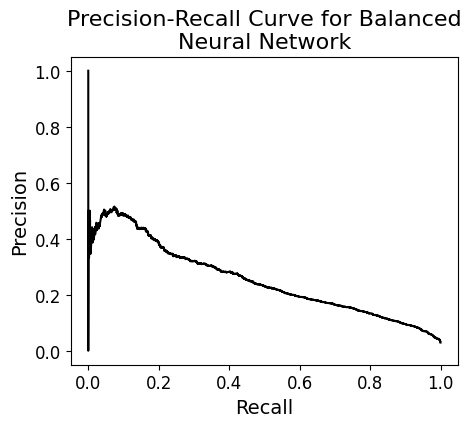

Area Under the PRC: 0.2536707515872993
[[35071 11139]
 [  139  1177]]
the recall for class 1 is 0.8943768996960486
the precision for class 1 is 0.09556674244884703


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


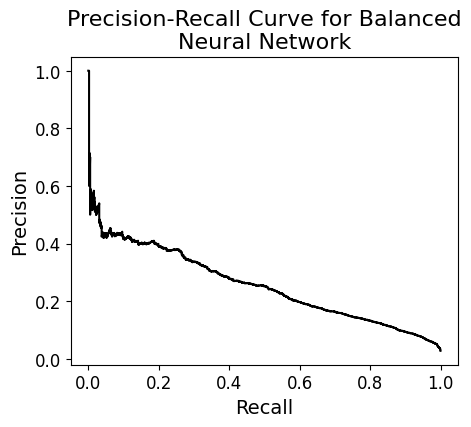

Area Under the PRC: 0.25639152856863273
[[37193  8968]
 [  187  1178]]
the recall for class 1 is 0.863003663003663
the precision for class 1 is 0.11610486891385768


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


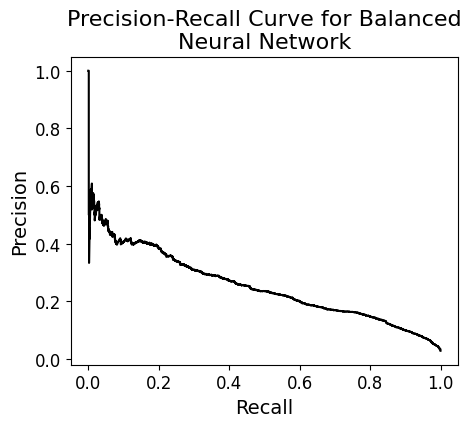

Area Under the PRC: 0.25293087789019086
[[38722  7522]
 [  238  1044]]
the recall for class 1 is 0.8143525741029641
the precision for class 1 is 0.12187718888629466


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


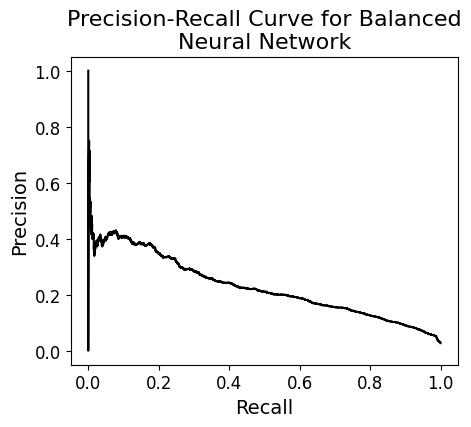

Area Under the PRC: 0.2290826644928911


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


[[37960  8306]
 [  205  1055]]
the recall for class 1 is 0.8373015873015873
the precision for class 1 is 0.11270163444076488


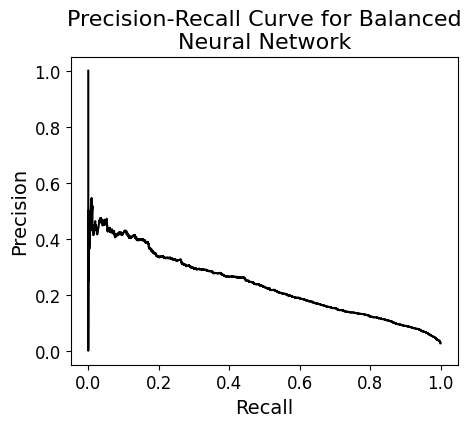

Area Under the PRC: 0.2369630088077807
[array([0.00438786, 0.00438851, 0.00438851, ..., 0.01492386, 0.01492465,
       0.01492489]), array([0.00638124, 0.00638136, 0.00638137, ..., 0.01312394, 0.01313237,
       0.01313327]), array([0.00476309, 0.00477216, 0.00477975, ..., 0.01433028, 0.01433612,
       0.01433841]), array([0.00538475, 0.00538476, 0.0053848 , ..., 0.01715085, 0.01715233,
       0.01716025]), array([0.00617549, 0.0061755 , 0.0061755 , ..., 0.01382001, 0.01382257,
       0.01385378])]
(np.float64(0.010082004892029305), np.float64(0.009690660986280339))
(np.float64(0.7132937912417239), np.float64(0.01414263166992532))


In [81]:
#hidden layer size 50: PRC and extracting thresholds:
#looking at a neural network with hidden layer size [50], using 5-fold cross validation
thresholds_recall_2 = []
thresholds_recall_09 = []

rus = RandomUnderSampler(sampling_strategy="majority")
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)

recall1 = []
auprc1 = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    clf = MLPClassifier(hidden_layer_sizes=[50], activation="logistic", solver="sgd").fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)

    #confusion matrix
    confm1 = confusion_matrix(y_test, y_pred)
    print(confm1)

    #looking at the recall of class 1
    recall = confm1[1,1] / confm1[1, :].sum()
    print(f"the recall for class 1 is {recall}")
    recall1.append(recall)

    #precision of class 1
    precision = confm1[1,1] / confm1[:, 1].sum()
    print(f"the precision for class 1 is {precision}")

    y_pred_probas = clf.predict_proba(X_test)[:, 1]

    #looking at the PRC (Precision Recall Curve)
    precision, recall, prc_thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_probas, pos_label=1)
    plt.figure(figsize=(5, 4))
    plt.plot(recall, precision, color = "black")
    plt.xlabel("Recall", fontsize = 14)
    plt.ylabel("Precision", fontsize = 14)
    wrapped_title = textwrap.fill("Precision-Recall Curve for Balanced Neural Network", width=40)
    plt.title(wrapped_title, fontsize=16)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()

    auprc = average_precision_score(y_test, y_pred_probas)
    print(f"Area Under the PRC: {auprc}")
    auprc1.append(auprc)

    recall_1_indices = recall[:-1] == 1 
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_2.append(recall_1_threshold)

    recall_1_indices = ((recall[:-1] < 1) & (recall[:-1] > 0.7))
    if recall_1_indices.any(): 
        recall_1_threshold = prc_thresholds[recall_1_indices]
        thresholds_recall_09.append(recall_1_threshold)

print(thresholds_recall_2)
high = thresholds_recall_2[-1]
low = thresholds_recall_2[0]
avghigh = np.mean(high)
avglow = np.mean(low)
print((avghigh, avglow))

high09 = [thresholds_recall_09[i][-1] for i in range(3)]
low09 = [thresholds_recall_09[i][0] for i in range(3)]
avghigh09 = np.mean(high09)
avglow09 = np.mean(low09)
print((avghigh09, avglow09))

In [82]:
print(avghigh)

0.010082004892029305


In [83]:
#classifying with this new threshold (avghigh):
rus = RandomUnderSampler(sampling_strategy="majority")
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=0)

recalls = []
precisions = []
for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    clf = MLPClassifier(hidden_layer_sizes=[50], activation="logistic", solver="sgd").fit(X_train_res, y_train_res)

    y_pred_proba = clf.predict_proba(X_test_fold)[:, 1]
    y_pred = []
    for i in range(len(y_pred_proba)):
        if y_pred_proba[i] > avghigh: #0.008567118228462055
            y_pred.append(1)
        else:
            y_pred.append(0)
 
    #confusion matrix
    confm1 = confusion_matrix(y_test_fold, y_pred)
    print(confm1)
    #confmatrices.append(confm1)

    #looking at recall
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recalls.append(recall)
    print("recall for class 1 is", recall)

    #looking at precision:
    precision = confm1[1, 1]/confm1[:, 1].sum()
    precisions.append(precision)
    print("Precision for class 1 is ", precision)

    print("---------\n")
print(f"average recall is ", np.array(recalls).mean())
print(f"average precision is ", np.array(precisions).mean(), "with std of ", np.std(np.array(precisions)))

/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 1618 35327]
 [    0  1076]]
recall for class 1 is 1.0
Precision for class 1 is  0.029558003461253195
---------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 1466 35504]
 [    0  1051]]
recall for class 1 is 1.0
Precision for class 1 is  0.028751196826699493
---------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 1884 35064]
 [    0  1073]]
recall for class 1 is 1.0
Precision for class 1 is  0.029692558873177077
---------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 1451 35512]
 [    0  1058]]
recall for class 1 is 1.0
Precision for class 1 is  0.028930817610062894
---------

[[ 1612 35319]
 [    0  1089]]
recall for class 1 is 1.0
Precision for class 1 is  0.029911008569545153
---------

average recall is  1.0
average precision is  0.02936871706814756 with std of  0.0004489699566288808


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [84]:
print(np.mean(np.array([0.036151466236212, 0.03523620055973295, 0.03652843561522472, 0.036566308990519845, 0.03636607172755584])))
print(np.std(np.array([0.036151466236212, 0.03523620055973295, 0.03652843561522472, 0.036566308990519845, 0.03636607172755584])))

0.036169696625849075
0.0004891432230827584


In [85]:
avghigh09

np.float64(0.7132937912417239)

In [86]:
#classifying with this new threshold (avghigh09):
rus = RandomUnderSampler(sampling_strategy="majority")
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=0)

recalls = []
precisions = []
for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    clf = MLPClassifier(hidden_layer_sizes=[50], activation="logistic", solver="sgd").fit(X_train_res, y_train_res)

    y_pred_proba = clf.predict_proba(X_test_fold)[:, 1]
    y_pred = []
    for i in range(len(y_pred_proba)):
        if y_pred_proba[i] > avghigh09: 
            y_pred.append(1)
        else:
            y_pred.append(0)
 
    #confusion matrix
    confm1 = confusion_matrix(y_test_fold, y_pred)
    print(confm1)

    #looking at recall
    recall = recall_score(y_test_fold, y_pred, pos_label=1)
    recalls.append(recall)
    print("recall for class 1 is", recall)

    #looking at precision:
    precision = confm1[1, 1]/confm1[:, 1].sum()
    precisions.append(precision)
    print("Precision for class 1 is ", precision)

    print("---------\n")
print(f"average recall is ", np.array(recalls).mean())
print(f"average precision is ", np.array(precisions).mean(), "wth std of ", np.array(precisions).std())


[[32448  4497]
 [  248   828]]
recall for class 1 is 0.7695167286245354
Precision for class 1 is  0.15549295774647887
---------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[33556  3414]
 [  337   714]]
recall for class 1 is 0.6793529971455756
Precision for class 1 is  0.17296511627906977
---------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[32572  4376]
 [  249   824]]
recall for class 1 is 0.7679403541472507
Precision for class 1 is  0.15846153846153846
---------



/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[32788  4175]
 [  307   751]]
recall for class 1 is 0.7098298676748582
Precision for class 1 is  0.15245635403978888
---------

[[33029  3902]
 [  359   730]]
recall for class 1 is 0.6703397612488522
Precision for class 1 is  0.15759930915371329
---------

average recall is  0.7193959417682143
average precision is  0.15939505513611785 wth std of  0.0070938657075098


/Users/margheritatonon/anaconda3/envs/MachineLearningProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
